In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
train = pd.read_csv('/home/lab10/Dacon/contest/public_data/train.csv')
pd.set_option('max_columns', 50)

In [4]:
train['date'] = pd.to_datetime(train['date'])
train['Wday'] = train['date'].dt.day_name()
train['yyyy'] = train['date'].dt.strftime('%Y')
train['mm'] = train['date'].dt.strftime('%m')
train['dd'] = train['date'].dt.strftime('%d')
train = train[['date', '요일', 'yyyy', 'mm',
       'dd','Wday','배추_거래량(kg)', '배추_가격(원/kg)', '무_거래량(kg)', '무_가격(원/kg)',
       '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)', '건고추_가격(원/kg)',
       '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)', '대파_가격(원/kg)',
       '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)', '양배추_가격(원/kg)',
       '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)', '시금치_가격(원/kg)',
       '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)', '당근_가격(원/kg)',
       '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)', '새송이_가격(원/kg)',
       '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)', '토마토_가격(원/kg)',
       '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)', '백다다기_가격(원/kg)',
       '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)', '캠벨얼리_가격(원/kg)',
       '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)']]

In [5]:
train.head(5)

date   요일  yyyy  mm  dd      Wday  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  \
0 2016-01-01  금요일  2016  01  01    Friday         0.0          0.0        0.0   
1 2016-01-02  토요일  2016  01  02  Saturday     80860.0        329.0    80272.0   
2 2016-01-03  일요일  2016  01  03    Sunday         0.0          0.0        0.0   
3 2016-01-04  월요일  2016  01  04    Monday   1422742.5        478.0  1699653.7   
4 2016-01-05  화요일  2016  01  05   Tuesday   1167241.0        442.0  1423482.3   

   무_가격(원/kg)  양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  마늘_거래량(kg)  \
0         0.0         0.0          0.0          0.0           0.0         0.0   
1       360.0    122787.5       1281.0          3.0       11000.0     15019.0   
2         0.0         0.0          0.0          0.0           0.0         0.0   
3       382.0   2315079.0       1235.0        699.0        4464.0    141638.0   
4       422.0   2092960.1       1213.0       1112.6        4342.0    126207.8   

   마늘_가격(원/kg)  대파_거래량(kg)  대파_가격(원/kg)  얼갈이배추_거래량(kg)  얼갈이배추_가격(원/kg)  \
0          0.0         0.0          0.0            0.0             0.0   
1       5475.0     92334.0       1704.0         6359.0          1331.0   
2          0.0         0.0          0.0            0.0             0.0   
3       5210.0    994328.1       1716.0       262615.5          1212.0   
4       5387.0    787716.0       1715.0       221850.5          1197.0   

   양배추_거래량(kg)  양배추_가격(원/kg)  깻잎_거래량(kg)  깻잎_가격(원/kg)  시금치_거래량(kg)  \
0          0.0           0.0         0.0          0.0          0.0   
1      40028.0         348.0      4374.9      13242.0      16550.5   
2          0.0           0.0         0.0          0.0          0.0   
3    1074699.1         345.0    122613.5       9923.0     427435.1   
4     825681.9         350.0     79055.9       9529.0     334636.8   

   시금치_가격(원/kg)  미나리_거래량(kg)  미나리_가격(원/kg)  당근_거래량(kg)  당근_가격(원/kg)  \
0           0.0          0.0           0.0         0.0          0.0   
1        2339.0      10528.0        1729.0     13885.0        804.0   
2           0.0          0.0           0.0         0.0          0.0   
3        2153.0      82113.5        3960.0    558950.2        794.0   
4        2220.0      80144.0        3333.0    444353.7        763.0   

   파프리카_거래량(kg)  파프리카_가격(원/kg)  새송이_거래량(kg)  새송이_가격(원/kg)  팽이버섯_거래량(kg)  \
0           0.0            0.0          0.0           0.0           0.0   
1        3853.0         3703.0      15797.0        2576.0       14634.0   
2           0.0            0.0          0.0           0.0           0.0   
3      104930.3         4871.0     277326.5        2440.0      159800.0   
4      100699.5         5129.0     218465.2        2437.0      153084.0   

   팽이버섯_가격(원/kg)  토마토_거래량(kg)  토마토_가격(원/kg)  청상추_거래량(kg)  청상추_가격(원/kg)  \
0            0.0          0.0           0.0          0.0           0.0   
1         1474.0      30950.0        1621.0       5125.0        9235.0   
2            0.0          0.0           0.0          0.0           0.0   
3         1750.0     291057.0        1834.0      38525.5        7631.0   
4         1822.0     194626.5        1833.0      32615.0        6926.0   

   백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  애호박_가격(원/kg)  캠벨얼리_거래량(kg)  \
0           0.0            0.0          0.0           0.0           0.0   
1         434.0         2109.0      19159.0        2414.0         880.0   
2           0.0            0.0          0.0           0.0           0.0   
3      500702.0         2046.0     620539.0        2018.0        2703.8   
4      147638.0         2268.0     231958.0        2178.0        8810.0   

   캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)  
0            0.0            0.0             0.0  
1         2014.0            0.0             0.0  
2            0.0            0.0             0.0  
3         3885.0            0.0             0.0  
4         2853.0            0.0             0.0

In [6]:
train.tail()

date   요일  yyyy  mm  dd      Wday  배추_거래량(kg)  배추_가격(원/kg)  \
1728 2020-09-24  목요일  2020  09  24  Thursday   1856965.0       1839.0   
1729 2020-09-25  금요일  2020  09  25    Friday   1880095.5       1789.0   
1730 2020-09-26  토요일  2020  09  26  Saturday   1661090.9       1760.0   
1731 2020-09-27  일요일  2020  09  27    Sunday     25396.0       3066.0   
1732 2020-09-28  월요일  2020  09  28    Monday   2405051.9       1867.0   

      무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  \
1728  2055640.0       990.0   2281429.2        990.0       2818.4   
1729  1879261.0      1011.0   2074513.0        955.0       1887.1   
1730  1709385.7      1075.0   2089081.2        961.0        959.0   
1731    38222.0      1139.0     18240.0       1056.0         60.0   
1732  2747519.5      1147.0   2235784.7        964.0       1630.6   

      건고추_가격(원/kg)  마늘_거래량(kg)  마늘_가격(원/kg)  대파_거래량(kg)  대파_가격(원/kg)  \
1728       19101.0    134359.9       4775.0    770271.0       2380.0   
1729       23095.0    126926.0       5039.0    781384.8       2239.0   
1730       22510.0    110357.7       5565.0    810812.8       2126.0   
1731       22333.0       620.0       5227.0     18291.4       1866.0   
1732       22022.0    175584.1       4757.0    972402.9       2614.0   

      얼갈이배추_거래량(kg)  얼갈이배추_가격(원/kg)  양배추_거래량(kg)  양배추_가격(원/kg)  깻잎_거래량(kg)  \
1728       440799.7          1868.0     656500.5        1143.0     79508.0   
1729       424009.4          2047.0     716803.2        1090.0     84842.0   
1730       414436.4          2095.0     502673.3        1326.0     99449.0   
1731         4022.0           798.0      16573.0         998.0      2159.8   
1732       532361.5          2349.0     732005.3        1423.0    156779.7   

      깻잎_가격(원/kg)  시금치_거래량(kg)  시금치_가격(원/kg)  미나리_거래량(kg)  미나리_가격(원/kg)  \
1728      10028.0      69843.5        6329.0      60020.8        4950.0   
1729      10921.0      89315.4        6262.0     124693.1        2595.0   
1730      10607.0     124259.5        7123.0      75850.1        4310.0   
1731      12195.0       1091.0        7178.0        676.0        1869.0   
1732      11164.0     293159.8        8145.0      96162.5        7196.0   

      당근_거래량(kg)  당근_가격(원/kg)  파프리카_거래량(kg)  파프리카_가격(원/kg)  새송이_거래량(kg)  \
1728    423233.2       1565.0       94152.5         9206.0     200810.1   
1729    400527.2       1773.0       87127.3         9084.0     222932.0   
1730    187076.2       1405.0      102672.0         9198.0     249009.1   
1731        60.0       3750.0           0.0            0.0       4766.0   
1732    422012.6       2001.0      183983.8         9393.0     315101.7   

      새송이_가격(원/kg)  팽이버섯_거래량(kg)  팽이버섯_가격(원/kg)  토마토_거래량(kg)  토마토_가격(원/kg)  \
1728        2927.0      129997.7         2545.0     142487.0        5587.0   
1729        2994.0      130379.3         2598.0     152575.5        5596.0   
1730        2942.0      130047.4         2617.0     176807.0        5262.0   
1731        2946.0        2500.0         2573.0        910.0        3781.0   
1732        3360.0      166041.5         3069.0     285116.5        5024.0   

      청상추_거래량(kg)  청상추_가격(원/kg)  백다다기_거래량(kg)  백다다기_가격(원/kg)  애호박_거래량(kg)  \
1728      50730.0        4509.0      282212.3         3001.0     313139.7   
1729      54322.0        4178.0      312214.8         2999.0     362741.0   
1730      61213.0        3770.0      327395.8         3065.0     390361.2   
1731        144.0        4076.0         285.0         3707.0       2464.0   
1732      84155.0        4167.0      554862.6         2873.0     667745.0   

      애호박_가격(원/kg)  캠벨얼리_거래량(kg)  캠벨얼리_가격(원/kg)  샤인마스캇_거래량(kg)  샤인마스캇_가격(원/kg)  
1728        3426.0      504242.6         3620.0       283196.9         10940.0  
1729        3357.0      479683.1         3618.0       303779.6         10844.0  
1730        3092.0      521493.8         3691.0       313295.7         10636.0  
1731        3252.0       21717.0         3567.0         9734.0         10699.0  
1732        2782

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 48 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1733 non-null   datetime64[ns]
 1   요일              1733 non-null   object        
 2   yyyy            1733 non-null   object        
 3   mm              1733 non-null   object        
 4   dd              1733 non-null   object        
 5   Wday            1733 non-null   object        
 6   배추_거래량(kg)      1733 non-null   float64       
 7   배추_가격(원/kg)     1733 non-null   float64       
 8   무_거래량(kg)       1733 non-null   float64       
 9   무_가격(원/kg)      1733 non-null   float64       
 10  양파_거래량(kg)      1733 non-null   float64       
 11  양파_가격(원/kg)     1733 non-null   float64       
 12  건고추_거래량(kg)     1733 non-null   float64       
 13  건고추_가격(원/kg)    1733 non-null   float64       
 14  마늘_거래량(kg)      1733 non-null   float64       
 15  마늘_가

In [8]:
train.shape

(1733, 48)

In [9]:
train.mean()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


yyyy                       inf
mm                         inf
dd                         inf
배추_거래량(kg)        1.113022e+06
배추_가격(원/kg)       5.971206e+02
무_거래량(kg)         1.274344e+06
무_가격(원/kg)        4.907386e+02
양파_거래량(kg)        1.656628e+06
양파_가격(원/kg)       6.528125e+02
건고추_거래량(kg)       3.578542e+03
건고추_가격(원/kg)      9.537642e+03
마늘_거래량(kg)        1.383455e+05
마늘_가격(원/kg)       3.433507e+03
대파_거래량(kg)        5.705150e+05
대파_가격(원/kg)       1.160816e+03
얼갈이배추_거래량(kg)     2.563302e+05
얼갈이배추_가격(원/kg)    9.021454e+02
양배추_거래량(kg)       5.626202e+05
양배추_가격(원/kg)      5.248857e+02
깻잎_거래량(kg)        8.019116e+04
깻잎_가격(원/kg)       4.614093e+03
시금치_거래량(kg)       1.516904e+05
시금치_가격(원/kg)      2.364220e+03
미나리_거래량(kg)       7.043008e+04
미나리_가격(원/kg)      2.133585e+03
당근_거래량(kg)        2.751360e+05
당근_가격(원/kg)       9.141327e+02
파프리카_거래량(kg)      1.165736e+05
파프리카_가격(원/kg)     2.951681e+03
새송이_거래량(kg)       1.443486e+05
새송이_가격(원/kg)      1.873085e+03
팽이버섯_거래량(kg)      1.041714e+05
팽이버섯_가격(

In [10]:
train.std()

date              500 days 10:02:23.280362088
배추_거래량(kg)                      837633.435187
배추_가격(원/kg)                        410.151434
무_거래량(kg)                       706562.388654
무_가격(원/kg)                         299.193862
양파_거래량(kg)                       950692.83021
양파_가격(원/kg)                        366.613456
건고추_거래량(kg)                       24139.18864
건고추_가격(원/kg)                      8757.181661
마늘_거래량(kg)                      143141.243043
마늘_가격(원/kg)                       1751.773991
대파_거래량(kg)                      271050.839948
대파_가격(원/kg)                        645.805198
얼갈이배추_거래량(kg)                   135087.466528
얼갈이배추_가격(원/kg)                     524.265099
양배추_거래량(kg)                     276276.210084
양배추_가격(원/kg)                       340.872594
깻잎_거래량(kg)                       40646.588418
깻잎_가격(원/kg)                       2733.735259
시금치_거래량(kg)                     123432.803489
시금치_가격(원/kg)                      2018.054915
미나리_거래량(kg)                      4

In [11]:
train.isnull().sum()

date              0
요일                0
yyyy              0
mm                0
dd                0
Wday              0
배추_거래량(kg)        0
배추_가격(원/kg)       0
무_거래량(kg)         0
무_가격(원/kg)        0
양파_거래량(kg)        0
양파_가격(원/kg)       0
건고추_거래량(kg)       0
건고추_가격(원/kg)      0
마늘_거래량(kg)        0
마늘_가격(원/kg)       0
대파_거래량(kg)        0
대파_가격(원/kg)       0
얼갈이배추_거래량(kg)     0
얼갈이배추_가격(원/kg)    0
양배추_거래량(kg)       0
양배추_가격(원/kg)      0
깻잎_거래량(kg)        0
깻잎_가격(원/kg)       0
시금치_거래량(kg)       0
시금치_가격(원/kg)      0
미나리_거래량(kg)       0
미나리_가격(원/kg)      0
당근_거래량(kg)        0
당근_가격(원/kg)       0
파프리카_거래량(kg)      0
파프리카_가격(원/kg)     0
새송이_거래량(kg)       0
새송이_가격(원/kg)      0
팽이버섯_거래량(kg)      0
팽이버섯_가격(원/kg)     0
토마토_거래량(kg)       0
토마토_가격(원/kg)      0
청상추_거래량(kg)       0
청상추_가격(원/kg)      0
백다다기_거래량(kg)      0
백다다기_가격(원/kg)     0
애호박_거래량(kg)       0
애호박_가격(원/kg)      0
캠벨얼리_거래량(kg)      0
캠벨얼리_가격(원/kg)     0
샤인마스캇_거래량(kg)     0
샤인마스캇_가격(원/kg)    0
dtype: int64

In [12]:
train.describe()

배추_거래량(kg)  배추_가격(원/kg)     무_거래량(kg)   무_가격(원/kg)    양파_거래량(kg)  \
count  1.733000e+03  1733.000000  1.733000e+03  1733.000000  1.733000e+03   
mean   1.113022e+06   597.120600  1.274344e+06   490.738604  1.656628e+06   
std    8.376334e+05   410.151434  7.065624e+05   299.193862  9.506928e+05   
min    0.000000e+00     0.000000  0.000000e+00     0.000000  0.000000e+00   
25%    6.892023e+05   335.000000  1.008677e+06   324.000000  1.334250e+06   
50%    1.061471e+06   577.000000  1.374790e+06   453.000000  1.703356e+06   
75%    1.385737e+06   805.000000  1.661663e+06   717.000000  2.143338e+06   
max    5.210215e+06  5000.000000  3.859746e+06  1360.000000  5.024753e+06   

       양파_가격(원/kg)    건고추_거래량(kg)   건고추_가격(원/kg)    마늘_거래량(kg)  마늘_가격(원/kg)  \
count  1733.000000    1733.000000    1733.000000  1.733000e+03  1733.000000   
mean    652.812464    3578.541546    9537.642239  1.383455e+05  3433.506636   
std     366.613456   24139.188640    8757.181661  1.431412e+05  1751.773991   
min       0.000000       0.000000       0.000000  0.000000e+00     0.000000   
25%     467.000000     129.100000    6015.000000  7.392050e+04  2687.000000   
50%     638.000000     544.200000    8607.000000  1.040097e+05  3953.000000   
75%     925.000000    1753.000000   12500.000000  1.533750e+05  4758.000000   
max    2000.000000  413656.000000  170836.000000  1.092180e+06  6415.000000   

         대파_거래량(kg)  대파_가격(원/kg)  얼갈이배추_거래량(kg)  얼갈이배추_가격(원/kg)   양배추_거래량(kg)  \
count  1.733000e+03  1733.000000    1733.000000     1733.000000  1.733000e+03   
mean   5.705150e+05  1160.815926  256330.243566      902.145413  5.626202e+05   
std    2.710508e+05   645.805198  135087.466528      524.265099  2.762762e+05   
min    0.000000e+00     0.000000       0.000000        0.000000  0.000000e+00   
25%    5.523516e+05   853.000000  198110.500000      667.000000  5.229527e+05   
50%    6.485427e+05  1188.000000  289685.000000      918.000000  6.436717e+05   
75%    7.282878e+05  1551.000000  354815.400000     1174.000000  7.347380e+05   
max    1.302729e+06  3182.000000  618133.300000     3007.000000  1.165192e+06   

       양배추_가격(원/kg)     깻잎_거래량(kg)   깻잎_가격(원/kg)    시금치_거래량(kg)  시금치_가격(원/kg)  \
count   1733.000000    1733.000000   1733.000000    1733.000000   1733.000000   
mean     524.885747   80191.161281   4614.092902  151690.438777   2364.220427   
std      340.872594   40646.588418   2733.735259  123432.803489   2018.054915   
min        0.000000       0.000000      0.000000       0.000000      0.000000   
25%      311.000000   71171.300000   3387.000000   35381.000000   1468.000000   
50%      489.000000   88550.900000   4492.000000  139586.400000   1922.000000   
75%      773.000000  103722.000000   5942.000000  241679.200000   2623.000000   
max     1609.000000  256450.400000  14326.000000  666537.200000  14014.000000   

         미나리_거래량(kg)  미나리_가격(원/kg)     당근_거래량(kg)  당근_가격(원/kg)   파프리카_거래량(kg)  \
count    1733.000000   1733.000000    1733.000000  1733.000000    1733.000000   
mean    70430.079227   2133.585113  275135.965609   914.132718  116573.645759   
std     41665.404676   1525.646196  154303.528548   463.428648   66032.314912   
min         0.000000      0.000000       0.000000     0.000000       0.000000   
25%     49765.500000   1031.000000  180390.000000   811.000000   86782.200000   
50%     72715.600000   2132.000000  311458.000000   958.000000  124327.700000   
75%     97896.400000   3017.000000  382007.200000  1167.000000  159794.500000   
max    187230.400000   8370.000000  764860.600000  3750.000000  307079.200000   

       파프리카_가격(원/kg)    새송이_거래량(kg)  새송이_가격(원/kg)   팽이버섯_거래량(kg)  \
count    1733.000000    1733.000000   1733.000000    1733.000000   
mean     2951.681477  144348.644432   1873.084824  104171.368090   
std      1920.583833   67150.304712    859.023863   47220.947213   
min         0.000000       0.000000      0.000000       0.000000   
25%      1758.000000  148291.800000   1802.000000  109745.000000   
50%  

In [13]:
mon=train.loc[train['요일']=='월요일']
mon

date   요일  yyyy  mm  dd    Wday  배추_거래량(kg)  배추_가격(원/kg)  \
3    2016-01-04  월요일  2016  01  04  Monday   1422742.5        478.0   
10   2016-01-11  월요일  2016  01  11  Monday   1161028.0        398.0   
17   2016-01-18  월요일  2016  01  18  Monday   1125796.0        475.0   
24   2016-01-25  월요일  2016  01  25  Monday    676054.0        641.0   
31   2016-02-01  월요일  2016  02  01  Monday   1803744.5        638.0   
...         ...  ...   ...  ..  ..     ...         ...          ...   
1704 2020-08-31  월요일  2020  08  31  Monday   1441152.8       1133.0   
1711 2020-09-07  월요일  2020  09  07  Monday    975020.2       1614.0   
1718 2020-09-14  월요일  2020  09  14  Monday   1221538.6       2042.0   
1725 2020-09-21  월요일  2020  09  21  Monday   2046286.3       1813.0   
1732 2020-09-28  월요일  2020  09  28  Monday   2405051.9       1867.0   

      무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  \
3     1699653.7       382.0   2315079.0       1235.0        699.0   
10    1940798.7       336.0   1651529.5       1215.0         73.0   
17    1575175.4       344.0   1333422.3       1176.0        162.6   
24    1368930.2       644.0   1014462.0       1234.0        295.0   
31    2679932.8       760.0   2389867.0       1327.0        991.7   
...         ...         ...         ...          ...          ...   
1704  1461107.5       888.0   1760687.9        931.0       6560.6   
1711  1425166.5      1013.0   1665721.0        966.0       1949.6   
1718  1675569.2       925.0   2526891.5        961.0       6578.0   
1725  2340632.6       872.0   2494315.9        987.0       7711.3   
1732  2747519.5      1147.0   2235784.7        964.0       1630.6   

      건고추_가격(원/kg)  마늘_거래량(kg)  마늘_가격(원/kg)  대파_거래량(kg)  대파_가격(원/kg)  \
3           4464.0    141638.0       5210.0    994328.1       1716.0   
10          5712.0     65579.5       4956.0    904317.5       1323.0   
17          5161.0     71881.7       5066.0    755733.9       1403.0   
24          6814.0     86403.6       5835.0    579110.2       2499.0   
31          4922.0    109419.7       5756.0    963747.4       2808.0   
...            ...         ...          ...         ...          ...   
1704       25085.0    145167.4       3483.0    683145.3       1799.0   
1711       24526.0     40900.3       5037.0    543761.2       2868.0   
1718       24068.0    102969.1       5145.0    706342.8       2366.0   
1725       13766.0    113540.3       5111.0    844454.5       2028.0   
1732       22022.0    175584.1       4757.0    972402.9       2614.0   

      얼갈이배추_거래량(kg)  얼갈이배추_가격(원/kg)  양배추_거래량(kg)  양배추_가격(원/kg)  깻잎_거래량(kg)  \
3          262615.5          1212.0    1074699.1         345.0    122613.5   
10         208918.5           979.0     743937.2         303.0     97151.3   
17         214602.5          1062.0     704776.5         349.0     88950.8   
24         108108.5          1472.0     482324.6         562.0     30082.0   
31         312369.0          1819.0     917195.9         662.0     93810.4   
...             ...             ...          ...           ...         ...   
1704       330185.7          1703.0     622295.8         920.0    134210.4   
1711       266471.0          2254.0     547674.3        1188.0    107969.1   
1718       341919.7          2292.0     653718.7        1408.0    109655.0   
1725       449418.2          2000.0     776090.7        1178.0    121035.6   
1732       532361.5          2349.0     732005.3        1423.0    156779.7   

      깻잎_가격(원/kg)  시금치_거래량(kg)  시금치_가격(원/kg)  미나리_거래량(kg)  미나리_가격(원/kg)  \
3          9923.0     427435.1        2153.0      82113.5        3960.0   
10         5218.0     370402.6        2096.0      64987.2        2891.0   
17         5707.0     336890.1        2340.0      66261.9        3569.0   
24         8465.0     255032.0        2581.0      15947.2        2850.0   
31        10534.0     505832.3        3804.0      93097.9        4606.0   
...           ...          ...           ...          ...           ...   
17

In [14]:
tue=train.loc[train['요일']=='화요일']
tue

date   요일  yyyy  mm  dd     Wday  배추_거래량(kg)  배추_가격(원/kg)  \
4    2016-01-05  화요일  2016  01  05  Tuesday   1167241.0        442.0   
11   2016-01-12  화요일  2016  01  12  Tuesday    730460.1        431.0   
18   2016-01-19  화요일  2016  01  19  Tuesday    620390.0        511.0   
25   2016-01-26  화요일  2016  01  26  Tuesday    756644.5        623.0   
32   2016-02-02  화요일  2016  02  02  Tuesday   1289197.0        597.0   
...         ...  ...   ...  ..  ..      ...         ...          ...   
1698 2020-08-25  화요일  2020  08  25  Tuesday   1119462.3       1416.0   
1705 2020-09-01  화요일  2020  09  01  Tuesday   1279591.6       1093.0   
1712 2020-09-08  화요일  2020  09  08  Tuesday    540843.7       1994.0   
1719 2020-09-15  화요일  2020  09  15  Tuesday   1341387.6       2017.0   
1726 2020-09-22  화요일  2020  09  22  Tuesday   1757465.6       1838.0   

      무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  \
4     1423482.3       422.0   2092960.1       1213.0       1112.6   
11    1748847.8       309.0   1606583.0       1161.0       6321.0   
18    1103099.3       407.0   1271846.0       1176.0        889.0   
25    1071062.0       637.0   1705084.5       1142.0        580.0   
32    2055751.9       829.0   2442194.0       1208.0      11702.4   
...         ...         ...         ...          ...          ...   
1698  1373678.6       978.0   1735342.3        866.0       5106.0   
1705  1603737.0       845.0   1908771.1        912.0       6771.0   
1712  1177089.4       952.0   1278481.5        956.0       3994.0   
1719  1865875.2       900.0   1952268.0        971.0       6518.6   
1726  2159123.6       916.0   2076597.8        999.0       4805.2   

      건고추_가격(원/kg)  마늘_거래량(kg)  마늘_가격(원/kg)  대파_거래량(kg)  대파_가격(원/kg)  \
4           4342.0    126207.8       5387.0    787716.0       1715.0   
11          5498.0     94680.5       5083.0    773384.3       1321.0   
18          4441.0     76783.5       5088.0    529474.1       1777.0   
25          8068.0     95870.5       5261.0    547262.1       2333.0   
32          5733.0    146534.0       6198.0    758910.0       2756.0   
...            ...         ...          ...         ...          ...   
1698       23176.0    170223.2       4210.0    668884.8       1934.0   
1705       25795.0    168744.9       3323.0    705184.4       1559.0   
1712       24331.0     74042.5       5486.0    596599.9       2539.0   
1719       17265.0    131993.4       5433.0    767126.9       2206.0   
1726       20227.0    149140.1       5496.0    806606.3       2039.0   

      얼갈이배추_거래량(kg)  얼갈이배추_가격(원/kg)  양배추_거래량(kg)  양배추_가격(원/kg)  깻잎_거래량(kg)  \
4          221850.5          1197.0     825681.9         350.0     79055.9   
11         176629.0           991.0     669754.0         306.0     67584.4   
18         104811.5          1225.0     491428.5         418.0     55407.3   
25         131786.0          1360.0     363816.5         600.0     81357.7   
32         212635.5          1447.0     795526.7         642.0     62348.5   
...             ...             ...          ...           ...         ...   
1698       355380.9          1724.0     622065.6         916.0     90357.4   
1705       315944.2          1702.0     729856.9         776.0     98038.5   
1712       259722.0          1888.0     706765.0        1058.0     66677.1   
1719       351971.3          2194.0     633361.8        1147.0     82209.2   
1726       431711.9          2029.0     682691.3        1205.0     83946.9   

      깻잎_가격(원/kg)  시금치_거래량(kg)  시금치_가격(원/kg)  미나리_거래량(kg)  미나리_가격(원/kg)  \
4          9529.0     334636.8        2220.0      80144.0        3333.0   
11         5263.0     331065.7        2072.0      58316.0        3180.0   
18         6285.0     213654.1        2670.0      52657.5        3283.0   
25         7293.0     245204.6        3126.0      59429.0        4158.0   
32        11183.0     378760.0        3365.0      69423.5        4995.0   
...           ...          ...           ...          ...        

In [15]:
wed=train.loc[train['요일']=='수요일']
wed

date   요일  yyyy  mm  dd       Wday  배추_거래량(kg)  배추_가격(원/kg)  \
5    2016-01-06  수요일  2016  01  06  Wednesday   1045507.5        442.0   
12   2016-01-13  수요일  2016  01  13  Wednesday    642654.0        429.0   
19   2016-01-20  수요일  2016  01  20  Wednesday    505457.9        511.0   
26   2016-01-27  수요일  2016  01  27  Wednesday    974222.5        641.0   
33   2016-02-03  수요일  2016  02  03  Wednesday   1067445.5        675.0   
...         ...  ...   ...  ..  ..        ...         ...          ...   
1699 2020-08-26  수요일  2020  08  26  Wednesday   1124756.3       1373.0   
1706 2020-09-02  수요일  2020  09  02  Wednesday   1144746.8       1150.0   
1713 2020-09-09  수요일  2020  09  09  Wednesday   1181782.2       1585.0   
1720 2020-09-16  수요일  2020  09  16  Wednesday   1532777.2       1939.0   
1727 2020-09-23  수요일  2020  09  23  Wednesday   2007471.3       1807.0   

      무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  \
5     1904372.1       409.0   1860569.0       1263.0       1672.0   
12    1416822.0       307.0   1211231.0       1166.0        758.8   
19     858650.6       404.0    904781.5       1169.0        667.0   
26    1487508.3       581.0   1616172.0       1301.0        314.0   
33    2815389.2       657.0   1767479.0       1289.0        419.0   
...         ...         ...         ...          ...          ...   
1699  1267567.3      1088.0   1547838.0        896.0       5652.8   
1706  1385781.9       913.0   1724065.4        950.0       4348.2   
1713  1575106.2       840.0   1919432.1        998.0       6888.0   
1720  1919025.5       896.0   2090857.8        985.0       4880.6   
1727  2106715.4       955.0   2277192.4        983.0       2742.4   

      건고추_가격(원/kg)  마늘_거래량(kg)  마늘_가격(원/kg)  대파_거래량(kg)  대파_가격(원/kg)  \
5           7041.0     91531.0       5013.0    793584.9       1620.0   
12          6879.0     67457.0       5138.0    657071.5       1263.0   
19          8905.0     53803.1       4925.0    569452.9       1894.0   
26          4946.0     83759.3       5626.0    551575.4       2460.0   
33          5878.0    102904.3       6146.0    873423.4       2664.0   
...            ...         ...          ...         ...          ...   
1699       22219.0     76560.9       5572.0    668260.0       1898.0   
1706       25453.0    118494.6       5123.0    650382.7       1678.0   
1713       24168.0     83439.9       5204.0    534773.1       2400.0   
1720       21694.0    114095.3       5349.0    764800.0       2190.0   
1727       23609.0    107157.5       5322.0    734453.0       2216.0   

      얼갈이배추_거래량(kg)  얼갈이배추_가격(원/kg)  양배추_거래량(kg)  양배추_가격(원/kg)  깻잎_거래량(kg)  \
5          199151.0          1142.0     910812.3         327.0     78532.8   
12         149015.5           925.0     569321.5         319.0     61144.8   
19         132461.1          1274.0     408460.8         495.0     61993.4   
26         147406.9          1576.0     451522.5         530.0     61996.0   
33         271229.5          1393.0     725203.2         614.0     76195.4   
...             ...             ...          ...           ...         ...   
1699       317620.3          1647.0     624806.3         971.0     91172.8   
1706       333657.3          1615.0     732335.3         794.0     96376.3   
1713       309589.6          1722.0     538891.2        1115.0     69005.8   
1720       342426.7          2147.0     652786.2        1150.0     79512.5   
1727       437122.5          2127.0     670720.2        1178.0     80184.9   

      깻잎_가격(원/kg)  시금치_거래량(kg)  시금치_가격(원/kg)  미나리_거래량(kg)  미나리_가격(원/kg)  \
5          8123.0     357749.8        2219.0      76832.6        3133.0   
12         5302.0     266067.6        2015.0      49868.5        3404.0   
19         6425.0     220608.7        2507.0      57935.8        3457.0   
26         7627.0     306468.6        3091.0      61986.4        3553.0   
33        11065.0     467564.1        3263.0      91788.3        4917.0   
...           ...          ...           

In [16]:
tur=train.loc[train['요일']=='목요일']
tur

date   요일  yyyy  mm  dd      Wday  배추_거래량(kg)  배추_가격(원/kg)  \
6    2016-01-07  목요일  2016  01  07  Thursday   1039925.0        448.0   
13   2016-01-14  목요일  2016  01  14  Thursday    777445.9        441.0   
20   2016-01-21  목요일  2016  01  21  Thursday    435309.0        573.0   
27   2016-01-28  목요일  2016  01  28  Thursday   1037067.0        651.0   
34   2016-02-04  목요일  2016  02  04  Thursday   1201005.0        607.0   
...         ...  ...   ...  ..  ..       ...         ...          ...   
1700 2020-08-27  목요일  2020  08  27  Thursday   1020033.2       1561.0   
1707 2020-09-03  목요일  2020  09  03  Thursday    895628.0       1445.0   
1714 2020-09-10  목요일  2020  09  10  Thursday   1302290.8       1542.0   
1721 2020-09-17  목요일  2020  09  17  Thursday   1459130.1       1983.0   
1728 2020-09-24  목요일  2020  09  24  Thursday   1856965.0       1839.0   

      무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  \
6     1438990.2       428.0   1868011.7       1241.0       1191.0   
13    1412984.0       306.0   1313759.0       1148.0       1330.0   
20     836453.8       429.0   1131828.0       1143.0        267.0   
27    1442824.8       609.0   2602945.7       1197.0      12523.0   
34    2468896.1       644.0   2143338.5       1202.0        124.0   
...         ...         ...         ...          ...          ...   
1700  1234994.0      1175.0   1203052.2        906.0       1787.0   
1707   921850.6      1056.0   1597586.8        949.0       2714.5   
1714  1391998.7       891.0   1755775.4        972.0       6485.3   
1721  1609237.0       951.0   1985521.8        987.0       2296.0   
1728  2055640.0       990.0   2281429.2        990.0       2818.4   

      건고추_가격(원/kg)  마늘_거래량(kg)  마늘_가격(원/kg)  대파_거래량(kg)  대파_가격(원/kg)  \
6           3908.0    349913.8       4360.0    733312.0       1545.0   
13          4350.0    434987.4       3787.0    583850.6       1361.0   
20          6221.0    364437.4       4378.0    557564.0       1841.0   
27          5571.0    411801.0       4280.0    519336.6       2638.0   
34          6813.0    618333.0       4383.0    779112.3       2855.0   
...            ...         ...          ...         ...          ...   
1700       26021.0     93990.4       4948.0    670858.1       1932.0   
1707       21160.0     83222.5       5127.0    529274.7       2160.0   
1714       23747.0     95126.3       4966.0    655278.1       2343.0   
1721       21928.0    145701.0       5162.0    750650.2       2131.0   
1728       19101.0    134359.9       4775.0    770271.0       2380.0   

      얼갈이배추_거래량(kg)  얼갈이배추_가격(원/kg)  양배추_거래량(kg)  양배추_가격(원/kg)  깻잎_거래량(kg)  \
6          200119.0           992.0     836339.0         315.0     75987.7   
13         145332.3           977.0     716602.2         306.0     64268.3   
20         103022.0          1211.0     477514.4         487.0     50486.3   
27         197798.5          1537.0     503662.0         604.0     58598.5   
34         230882.5          1175.0     949451.0         624.0     83714.4   
...             ...             ...          ...           ...         ...   
1700       291084.8          1834.0     563491.2        1144.0     82020.0   
1707       296432.0          1521.0     663842.9         763.0     80208.7   
1714       279167.6          1989.0     579161.7        1125.0     76122.7   
1721       293894.0          2264.0     727494.0        1092.0     77424.0   
1728       440799.7          1868.0     656500.5        1143.0     79508.0   

      깻잎_가격(원/kg)  시금치_거래량(kg)  시금치_가격(원/kg)  미나리_거래량(kg)  미나리_가격(원/kg)  \
6          6793.0     323944.6        2208.0      49040.9        2259.0   
13         5283.0     292578.5        2199.0      19971.2        2317.0   
20         6502.0     249409.6        2571.0      19966.3        2177.0   
27         7989.0     287782.7        2981.0      58488.2        3932.0   
34        10878.0     467290.6        3326.0      91638.7        4972.0   
...           ...          ...           ...         

In [17]:
fri=train.loc[train['요일']=='금요일']
fri

date   요일  yyyy  mm  dd    Wday  배추_거래량(kg)  배추_가격(원/kg)  \
0    2016-01-01  금요일  2016  01  01  Friday         0.0          0.0   
7    2016-01-08  금요일  2016  01  08  Friday    942655.0        420.0   
14   2016-01-15  금요일  2016  01  15  Friday    793655.0        449.0   
21   2016-01-22  금요일  2016  01  22  Friday    558749.8        626.0   
28   2016-01-29  금요일  2016  01  29  Friday   1162861.4        625.0   
...         ...  ...   ...  ..  ..     ...         ...          ...   
1701 2020-08-28  금요일  2020  08  28  Friday    763266.0       1564.0   
1708 2020-09-04  금요일  2020  09  04  Friday    698187.5       1358.0   
1715 2020-09-11  금요일  2020  09  11  Friday   1156811.6       1576.0   
1722 2020-09-18  금요일  2020  09  18  Friday   1624514.7       1839.0   
1729 2020-09-25  금요일  2020  09  25  Friday   1880095.5       1789.0   

      무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  \
0           0.0         0.0         0.0          0.0          0.0   
7     1563537.8       390.0   1483395.0       1218.0        672.4   
14    1437415.0       307.0   1187834.0       1146.0        995.0   
21     882335.6       516.0   1133644.0       1171.0        901.0   
28    1320150.0       743.0   1916756.0       1322.0        260.0   
...         ...         ...         ...          ...          ...   
1701  1033920.2      1049.0   1214713.4        925.0       9371.0   
1708   909808.2       904.0   1499654.8        960.0       4486.0   
1715  1505489.4       859.0   2039041.4        979.0       7456.5   
1722  1874083.9       942.0   2085488.6        961.0       2819.8   
1729  1879261.0      1011.0   2074513.0        955.0       1887.1   

      건고추_가격(원/kg)  마늘_거래량(kg)  마늘_가격(원/kg)  대파_거래량(kg)  대파_가격(원/kg)  \
0              0.0         0.0          0.0         0.0          0.0   
7           4836.0     71284.7       4850.0    797767.3       1488.0   
14          6643.0     90583.9       4394.0    678290.4       1335.0   
21          4057.0     97552.5       5493.0    598422.6       1724.0   
28          7823.0    111679.2       5301.0    626963.3       2830.0   
...            ...         ...          ...         ...          ...   
1701       13357.0     74931.1       5053.0    513489.6       2365.0   
1708       24970.0     74560.9       4947.0    359629.3       2880.0   
1715       22272.0     91035.5       5342.0    683596.9       2222.0   
1722       21886.0     99957.6       5241.0    764899.1       2059.0   
1729       23095.0    126926.0       5039.0    781384.8       2239.0   

      얼갈이배추_거래량(kg)  얼갈이배추_가격(원/kg)  양배추_거래량(kg)  양배추_가격(원/kg)  깻잎_거래량(kg)  \
0               0.0             0.0          0.0           0.0         0.0   
7          183060.7           988.0     772649.0         313.0     79078.7   
14         169674.0           975.0     657962.3         309.0     69141.1   
21         123917.0          1205.0     587721.6         445.0     55884.2   
28         174306.0          1610.0     666148.4         629.0     57091.9   
...             ...             ...          ...           ...         ...   
1701       263045.1          1517.0     597485.5         915.0     84987.5   
1708       224482.2          1517.0     382671.4        1410.0     73611.6   
1715       280411.9          2295.0     626979.7        1114.0     77169.3   
1722       359367.8          2269.0     685381.7        1184.0     84444.5   
1729       424009.4          2047.0     716803.2        1090.0     84842.0   

      깻잎_가격(원/kg)  시금치_거래량(kg)  시금치_가격(원/kg)  미나리_거래량(kg)  미나리_가격(원/kg)  \
0             0.0          0.0           0.0          0.0           0.0   
7          5644.0     341967.7        2033.0      70512.3        2106.0   
14         5251.0     309816.7        2031.0      71290.8        3119.0   
21         7464.0     217600.0        2508.0      53016.9        3050.0   
28         9381.0     300423.2        3394.0      70492.6        4099.0   
...           ...          ...           ...          ...           ...   
17

In [18]:
sat=train.loc[train['요일']=='토요일']
sat

date   요일  yyyy  mm  dd      Wday  배추_거래량(kg)  배추_가격(원/kg)  \
1    2016-01-02  토요일  2016  01  02  Saturday     80860.0        329.0   
8    2016-01-09  토요일  2016  01  09  Saturday    689121.0        389.0   
15   2016-01-16  토요일  2016  01  16  Saturday    537832.1        454.0   
22   2016-01-23  토요일  2016  01  23  Saturday    666392.0        615.0   
29   2016-01-30  토요일  2016  01  30  Saturday    746880.0        733.0   
...         ...  ...   ...  ..  ..       ...         ...          ...   
1702 2020-08-29  토요일  2020  08  29  Saturday    760499.0       1476.0   
1709 2020-09-05  토요일  2020  09  05  Saturday   1104424.8       1329.0   
1716 2020-09-12  토요일  2020  09  12  Saturday    968110.0       1748.0   
1723 2020-09-19  토요일  2020  09  19  Saturday   1346091.4       1812.0   
1730 2020-09-26  토요일  2020  09  26  Saturday   1661090.9       1760.0   

      무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  \
1       80272.0       360.0    122787.5       1281.0          3.0   
8     1723983.9       345.0   1107262.5       1210.0       5456.6   
15    1033808.0       306.0    990370.5       1150.0         92.0   
22    1291951.6       491.0   1165045.0       1253.0        228.4   
29    1460051.0       726.0   1578967.0       1311.0       1386.0   
...         ...         ...         ...          ...          ...   
1702   883697.3       895.0   1595166.8        936.0       5029.4   
1709  1233700.7       916.0   1525633.8        967.0       5153.0   
1716  1354748.1       801.0   1635254.0        976.0       4620.2   
1723  1546003.5       919.0   1569765.3        976.0       3083.5   
1730  1709385.7      1075.0   2089081.2        961.0        959.0   

      건고추_가격(원/kg)  마늘_거래량(kg)  마늘_가격(원/kg)  대파_거래량(kg)  대파_가격(원/kg)  \
1          11000.0     15019.0       5475.0     92334.0       1704.0   
8           5112.0     65746.0       4527.0    739213.0       1433.0   
15          5246.0     62071.0       4728.0    611784.6       1339.0   
22          6821.0     86867.0       5410.0    600638.0       1959.0   
29         15677.0    101729.0       4741.0    745377.4       2707.0   
...            ...         ...          ...         ...          ...   
1702       26250.0     83846.3       5021.0    580538.5       1814.0   
1709       25646.0     56439.8       5042.0    646667.6       1888.0   
1716       23468.0     83663.0       5252.0    711635.8       2176.0   
1723       23563.0     97413.8       5003.0    734652.9       2046.0   
1730       22510.0    110357.7       5565.0    810812.8       2126.0   

      얼갈이배추_거래량(kg)  얼갈이배추_가격(원/kg)  양배추_거래량(kg)  양배추_가격(원/kg)  깻잎_거래량(kg)  \
1            6359.0          1331.0      40028.0         348.0      4374.9   
8          137180.5           912.0     663653.9         282.0     74088.1   
15         127370.0          1031.0     649659.0         315.0     71171.3   
22         140004.0          1346.0     654516.5         428.0     67993.8   
29         170378.5          1772.0     624548.6         694.0     62165.2   
...             ...             ...          ...           ...         ...   
1702       267995.8          1714.0     570916.1         727.0     98899.8   
1709       278399.4          2022.0     627947.6         900.0     86252.0   
1716       252578.6          2736.0     626575.5        1121.0     85884.1   
1723       366879.8          2118.0     619923.9        1209.0     97198.5   
1730       414436.4          2095.0     502673.3        1326.0     99449.0   

      깻잎_가격(원/kg)  시금치_거래량(kg)  시금치_가격(원/kg)  미나리_거래량(kg)  미나리_가격(원/kg)  \
1         13242.0      16550.5        2339.0      10528.0        1729.0   
8          5128.0     309096.2        2104.0      60824.6        2109.0   
15         5391.0     284958.5        2065.0      64451.5        3373.0   
22         9332.0     247024.1        2893.0      61658.5        4371.0   
29        10965.0     288255.4        3863.0      72935.7        4392.0   
...           ...          ...           ...         

In [19]:
sun=train.loc[train['요일']=='일요일']
sun

date   요일  yyyy  mm  dd    Wday  배추_거래량(kg)  배추_가격(원/kg)  \
2    2016-01-03  일요일  2016  01  03  Sunday         0.0          0.0   
9    2016-01-10  일요일  2016  01  10  Sunday         0.0          0.0   
16   2016-01-17  일요일  2016  01  17  Sunday         0.0          0.0   
23   2016-01-24  일요일  2016  01  24  Sunday         0.0          0.0   
30   2016-01-31  일요일  2016  01  31  Sunday       528.0       1048.0   
...         ...  ...   ...  ..  ..     ...         ...          ...   
1703 2020-08-30  일요일  2020  08  30  Sunday         0.0          0.0   
1710 2020-09-06  일요일  2020  09  06  Sunday         0.0          0.0   
1717 2020-09-13  일요일  2020  09  13  Sunday         0.0          0.0   
1724 2020-09-20  일요일  2020  09  20  Sunday      1959.0       2925.0   
1731 2020-09-27  일요일  2020  09  27  Sunday     25396.0       3066.0   

      무_거래량(kg)  무_가격(원/kg)  양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  \
2           0.0         0.0         0.0          0.0          0.0   
9           0.0         0.0         0.0          0.0          0.0   
16          0.0         0.0         0.0          0.0          0.0   
23          0.0         0.0         0.0          0.0          0.0   
30       7352.0       767.0     31360.0       1061.0         33.6   
...         ...         ...         ...          ...          ...   
1703        0.0         0.0         0.0          0.0          0.0   
1710        0.0         0.0         0.0          0.0          0.0   
1717        0.0         0.0    357882.0       1039.0          0.0   
1724     4240.0       760.0     17000.0       1068.0          0.0   
1731    38222.0      1139.0     18240.0       1056.0         60.0   

      건고추_가격(원/kg)  마늘_거래량(kg)  마늘_가격(원/kg)  대파_거래량(kg)  대파_가격(원/kg)  \
2              0.0         0.0          0.0         0.0          0.0   
9              0.0         0.0          0.0         0.0          0.0   
16             0.0         0.0          0.0         0.0          0.0   
23             0.0         0.0          0.0         0.0          0.0   
30          7333.0         0.0          0.0     17725.0       1237.0   
...            ...         ...          ...         ...          ...   
1703           0.0         0.0          0.0         0.0          0.0   
1710           0.0         0.0          0.0         0.0          0.0   
1717           0.0         0.0          0.0         0.0          0.0   
1724           0.0         0.0          0.0      2490.0       2218.0   
1731       22333.0       620.0       5227.0     18291.4       1866.0   

      얼갈이배추_거래량(kg)  얼갈이배추_가격(원/kg)  양배추_거래량(kg)  양배추_가격(원/kg)  깻잎_거래량(kg)  \
2               0.0             0.0          0.0           0.0         0.0   
9               0.0             0.0          0.0           0.0         0.0   
16              0.0             0.0          0.0           0.0         0.0   
23              0.0             0.0          0.0           0.0         0.0   
30           2944.0          1006.0       4342.0         671.0       964.0   
...             ...             ...          ...           ...         ...   
1703            0.0             0.0          0.0           0.0         0.0   
1710            0.0             0.0          0.0           0.0         0.0   
1717            0.0             0.0          0.0           0.0         0.0   
1724            0.0             0.0          0.0           0.0        75.0   
1731         4022.0           798.0      16573.0         998.0      2159.8   

      깻잎_가격(원/kg)  시금치_거래량(kg)  시금치_가격(원/kg)  미나리_거래량(kg)  미나리_가격(원/kg)  \
2             0.0          0.0           0.0          0.0           0.0   
9             0.0          0.0           0.0          0.0           0.0   
16            0.0          0.0           0.0          0.0           0.0   
23            0.0          0.0           0.0          0.0           0.0   
30        11276.0       4275.0        2232.0       1020.0         985.0   
...           ...          ...           ...          ...           ...   
17

In [20]:
train.set_index('date', inplace=True)
train

요일  yyyy  mm  dd      Wday  배추_거래량(kg)  배추_가격(원/kg)  무_거래량(kg)  \
date                                                                          
2016-01-01  금요일  2016  01  01    Friday         0.0          0.0        0.0   
2016-01-02  토요일  2016  01  02  Saturday     80860.0        329.0    80272.0   
2016-01-03  일요일  2016  01  03    Sunday         0.0          0.0        0.0   
2016-01-04  월요일  2016  01  04    Monday   1422742.5        478.0  1699653.7   
2016-01-05  화요일  2016  01  05   Tuesday   1167241.0        442.0  1423482.3   
...         ...   ...  ..  ..       ...         ...          ...        ...   
2020-09-24  목요일  2020  09  24  Thursday   1856965.0       1839.0  2055640.0   
2020-09-25  금요일  2020  09  25    Friday   1880095.5       1789.0  1879261.0   
2020-09-26  토요일  2020  09  26  Saturday   1661090.9       1760.0  1709385.7   
2020-09-27  일요일  2020  09  27    Sunday     25396.0       3066.0    38222.0   
2020-09-28  월요일  2020  09  28    Monday   2405051.9       1867.0  2747519.5   

            무_가격(원/kg)  양파_거래량(kg)  양파_가격(원/kg)  건고추_거래량(kg)  건고추_가격(원/kg)  \
date                                                                         
2016-01-01         0.0         0.0          0.0          0.0           0.0   
2016-01-02       360.0    122787.5       1281.0          3.0       11000.0   
2016-01-03         0.0         0.0          0.0          0.0           0.0   
2016-01-04       382.0   2315079.0       1235.0        699.0        4464.0   
2016-01-05       422.0   2092960.1       1213.0       1112.6        4342.0   
...                ...         ...          ...          ...           ...   
2020-09-24       990.0   2281429.2        990.0       2818.4       19101.0   
2020-09-25      1011.0   2074513.0        955.0       1887.1       23095.0   
2020-09-26      1075.0   2089081.2        961.0        959.0       22510.0   
2020-09-27      1139.0     18240.0       1056.0         60.0       22333.0   
2020-09-28      1147.0   2235784.7        964.0       1630.6       22022.0   

            마늘_거래량(kg)  마늘_가격(원/kg)  대파_거래량(kg)  대파_가격(원/kg)  얼갈이배추_거래량(kg)  \
date                                                                          
2016-01-01         0.0          0.0         0.0          0.0            0.0   
2016-01-02     15019.0       5475.0     92334.0       1704.0         6359.0   
2016-01-03         0.0          0.0         0.0          0.0            0.0   
2016-01-04    141638.0       5210.0    994328.1       1716.0       262615.5   
2016-01-05    126207.8       5387.0    787716.0       1715.0       221850.5   
...                ...          ...         ...          ...            ...   
2020-09-24    134359.9       4775.0    770271.0       2380.0       440799.7   
2020-09-25    126926.0       5039.0    781384.8       2239.0       424009.4   
2020-09-26    110357.7       5565.0    810812.8       2126.0       414436.4   
2020-09-27       620.0       5227.0     18291.4       1866.0         4022.0   
2020-09-28    175584.1       4757.0    972402.9       2614.0       532361.5   

            얼갈이배추_가격(원/kg)  양배추_거래량(kg)  양배추_가격(원/kg)  깻잎_거래량(kg)  \
date                                                                
2016-01-01             0.0          0.0           0.0         0.0   
2016-01-02          1331.0      40028.0         348.0      4374.9   
2016-01-03             0.0          0.0           0.0         0.0   
2016-01-04          1212.0    1074699.1         345.0    122613.5   
2016-01-05          1197.0     825681.9         350.0     79055.9   
...                    ...          ...           ...         ...   
2020-09-24          1868.0     656500.5        1143.0     79508.0   
2020-09-25          2047.0     716803.2        1090.0     84842.0   
2020-09-26          2095.0     502673.3        1326.0     99449.0   
2020-09-27           798.0      16573.0         998.0      2159.8   
2020-09-28          2349.0     732005.3        1423.0    156779.7   

            깻잎_가격(원/kg)  시금치_거래량(kg)  시금치_가격

In [21]:
train.columns

Index(['요일', 'yyyy', 'mm', 'dd', 'Wday', '배추_거래량(kg)', '배추_가격(원/kg)',
       '무_거래량(kg)', '무_가격(원/kg)', '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)',
       '건고추_가격(원/kg)', '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)',
       '대파_가격(원/kg)', '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)',
       '양배추_가격(원/kg)', '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)',
       '시금치_가격(원/kg)', '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)',
       '당근_가격(원/kg)', '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)',
       '새송이_가격(원/kg)', '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)',
       '토마토_가격(원/kg)', '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)',
       '백다다기_가격(원/kg)', '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)',
       '캠벨얼리_가격(원/kg)', '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)'],
      dtype='object')

In [77]:
heat_ = train[['요일', 'yyyy', 'mm', 'dd', 'Wday', '배추_거래량(kg)', '배추_가격(원/kg)',
       '무_거래량(kg)', '무_가격(원/kg)', '양파_거래량(kg)', '양파_가격(원/kg)', '건고추_거래량(kg)',
       '건고추_가격(원/kg)', '마늘_거래량(kg)', '마늘_가격(원/kg)', '대파_거래량(kg)',
       '대파_가격(원/kg)', '얼갈이배추_거래량(kg)', '얼갈이배추_가격(원/kg)', '양배추_거래량(kg)',
       '양배추_가격(원/kg)', '깻잎_거래량(kg)', '깻잎_가격(원/kg)', '시금치_거래량(kg)',
       '시금치_가격(원/kg)', '미나리_거래량(kg)', '미나리_가격(원/kg)', '당근_거래량(kg)',
       '당근_가격(원/kg)', '파프리카_거래량(kg)', '파프리카_가격(원/kg)', '새송이_거래량(kg)',
       '새송이_가격(원/kg)', '팽이버섯_거래량(kg)', '팽이버섯_가격(원/kg)', '토마토_거래량(kg)',
       '토마토_가격(원/kg)', '청상추_거래량(kg)', '청상추_가격(원/kg)', '백다다기_거래량(kg)',
       '백다다기_가격(원/kg)', '애호박_거래량(kg)', '애호박_가격(원/kg)', '캠벨얼리_거래량(kg)',
       '캠벨얼리_가격(원/kg)', '샤인마스캇_거래량(kg)', '샤인마스캇_가격(원/kg)']].dropna().copy()

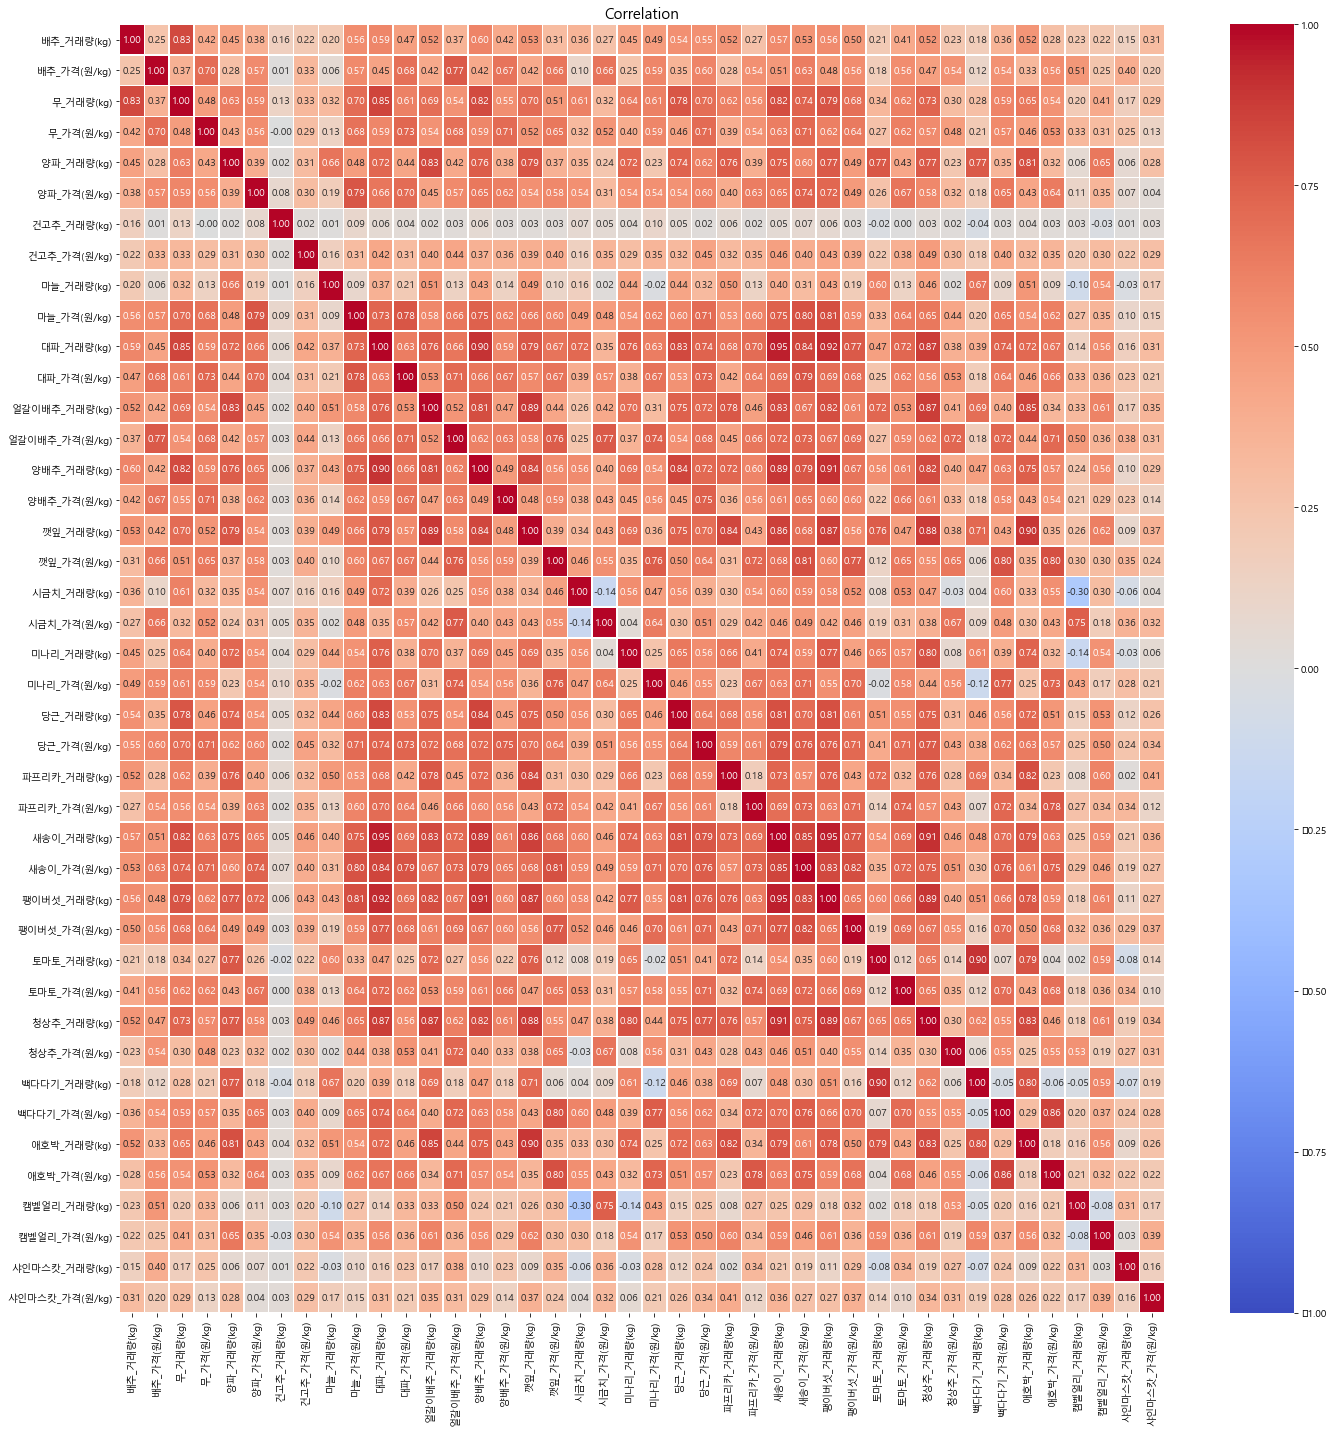

In [85]:
plt.figure(figsize=(20,20))
plt.title("Correlation", fontsize=15)
sns.heatmap(data = heat_.corr(),
            annot=True,
            fmt = '.2f', linewidths=.5, cmap='coolwarm',
           vmin = -1, vmax = 1, center = 0)
plt.tight_layout()  # 창 크기에 맞게 조정
plt.show()

In [149]:
def get_graph(item):

    fig,ax=plt.subplots(nrows=2,ncols=2, figsize=(20, 10))
    ax[0,0].plot(train[f'{item}_거래량(kg)'])
    ax[0,0].set_title(f'{item}_거래량(kg)')
    ax[0,1].plot(train[f'{item}_가격(원/kg)'])
    ax[0,1].set_title(f'{item}_가격(원/kg)')
    ax[1,0].hist(train[f'{item}_가격(원/kg)'])
    ax[1,0].set_title(f'{item}_가격(원/kg) 분포')
    ax[1,1].scatter(train[f'{item}_거래량(kg)'],train[f'{item}_가격(원/kg)'], s=12, alpha=0.3)
    ax[1,1].set_title(f'{item} 거래량 - {item} 가격')
    ax[1,1].set_xlabel(f'{item}_거래량(kg)')
    ax[1,1].set_ylabel(f'{item}_가격(원/kg)')

    plt.tight_layout()  # 창 크기에 맞게 조정
    plt.show()

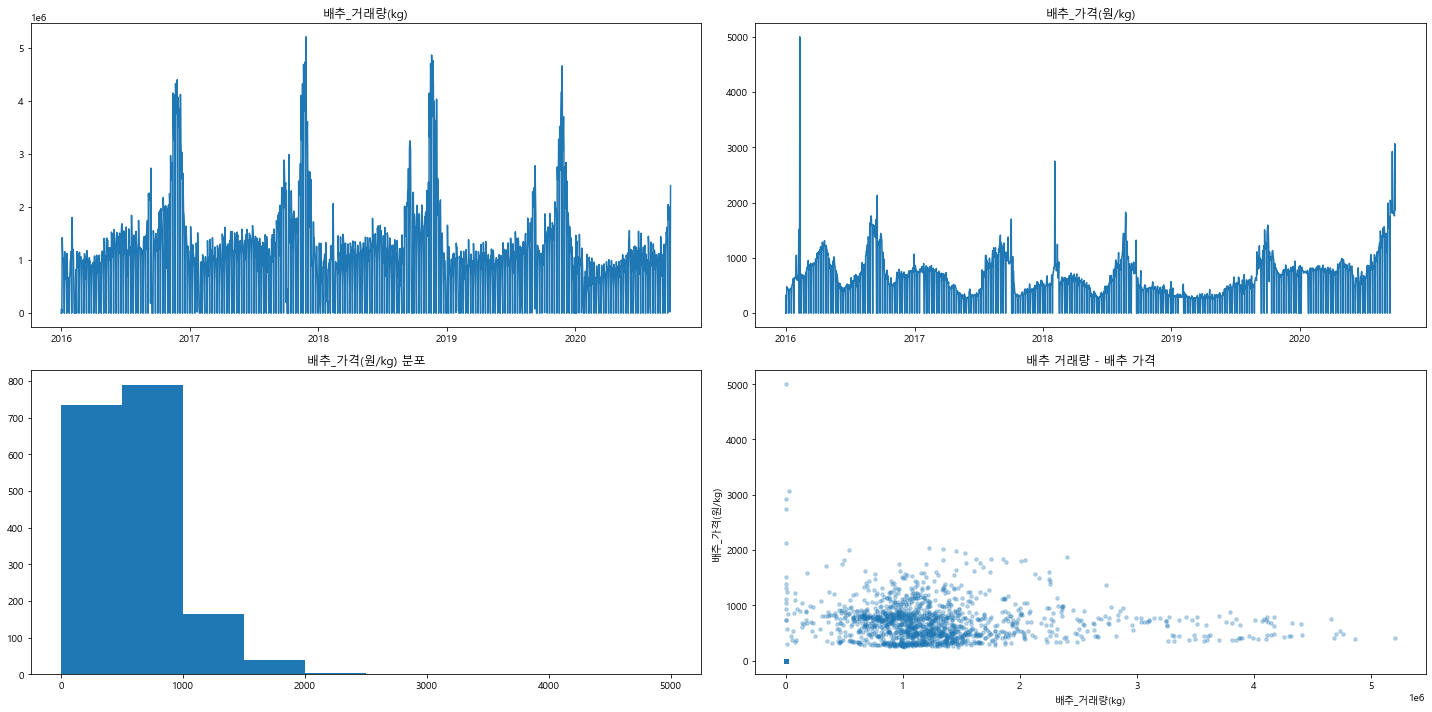

In [150]:
# 배추
## 봄 배추: 4~6월 출하
## 여름 배추(고랭지 배추): 7~10월 출하
## 가을 배추: 11월~1월 출하, 김장시기
## 겨울 배추: 1월~3월 출하
get_graph("배추")

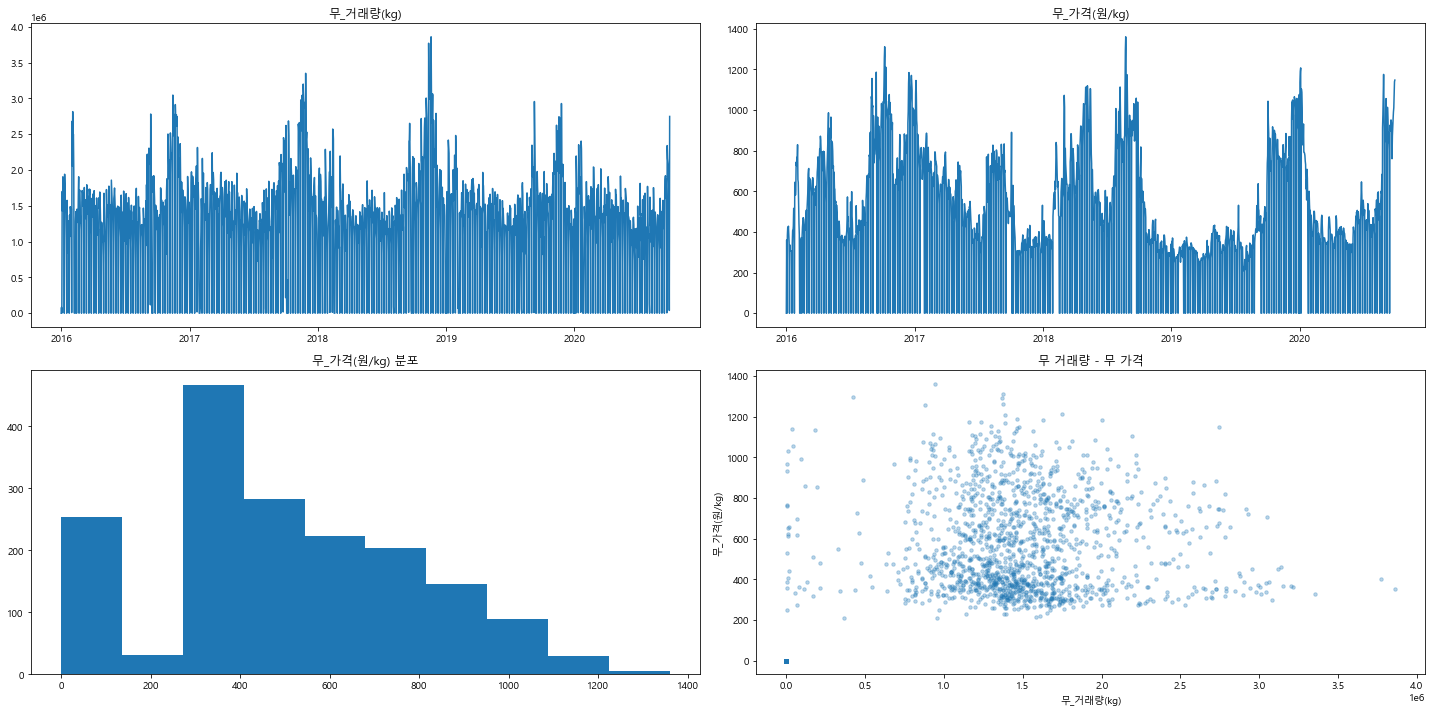

In [116]:
# 무

# 봄 무: 5~6월 수확
# 여름 무(고랭지 무): 10월
# 가을 무: 11월 수확, 김장용
# 월동 무: 12월~3월, 남쪽지방이나 제주도 재배

get_graph('무')

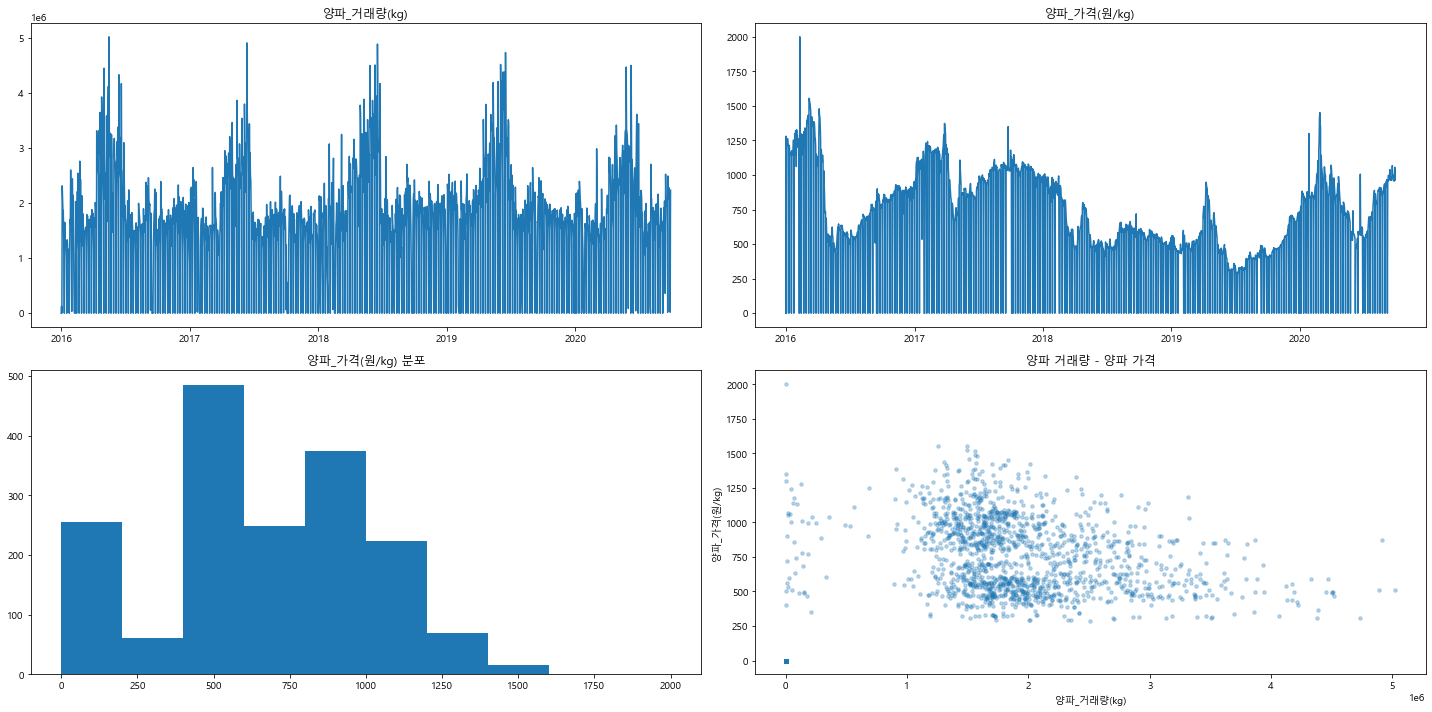

In [117]:
# 양파
# 조생종: 4월 경부터 수확
# 중생종: 6월 경부터 수확, 보편적으로 가장 많이 사용
# 만생종: 6월 경부터 수확
get_graph('양파')

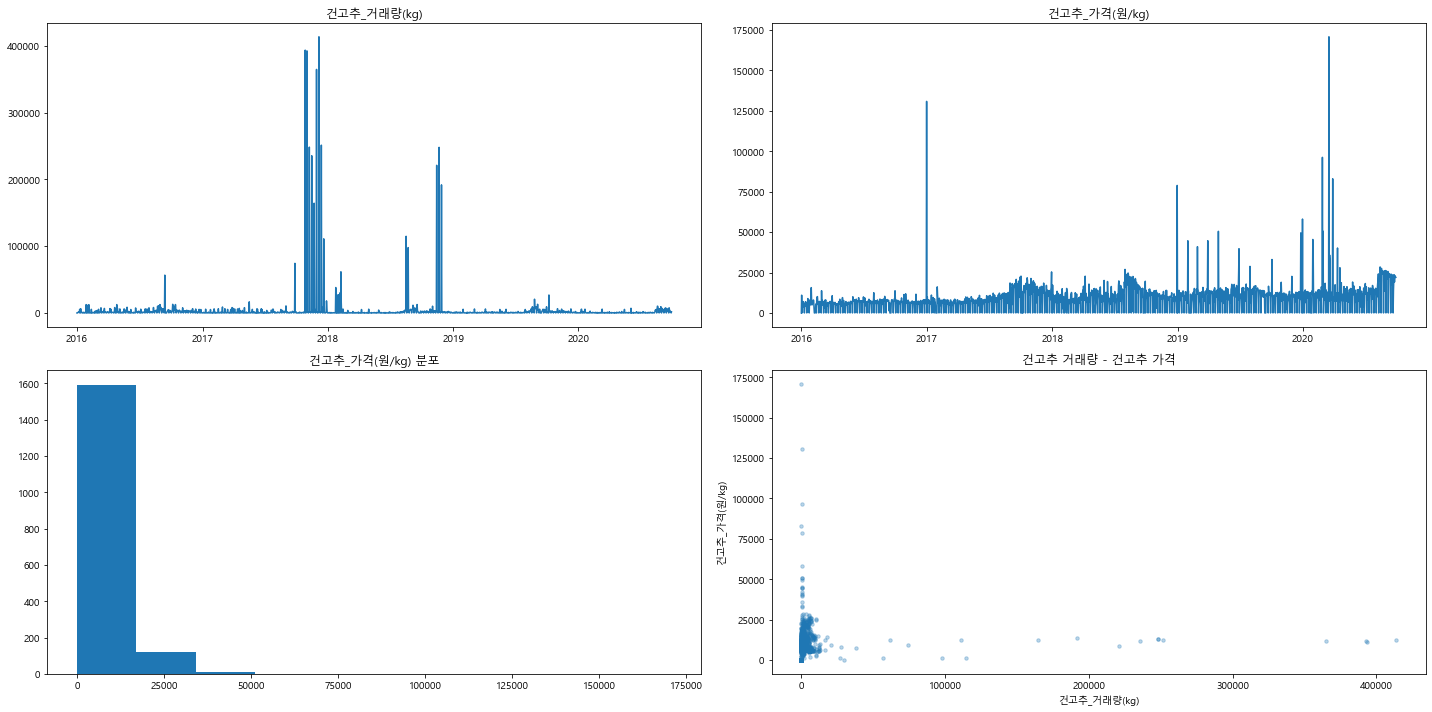

In [118]:
# 건고추

# 수입산이 큰 부분을 차지하고 있음
get_graph('건고추')

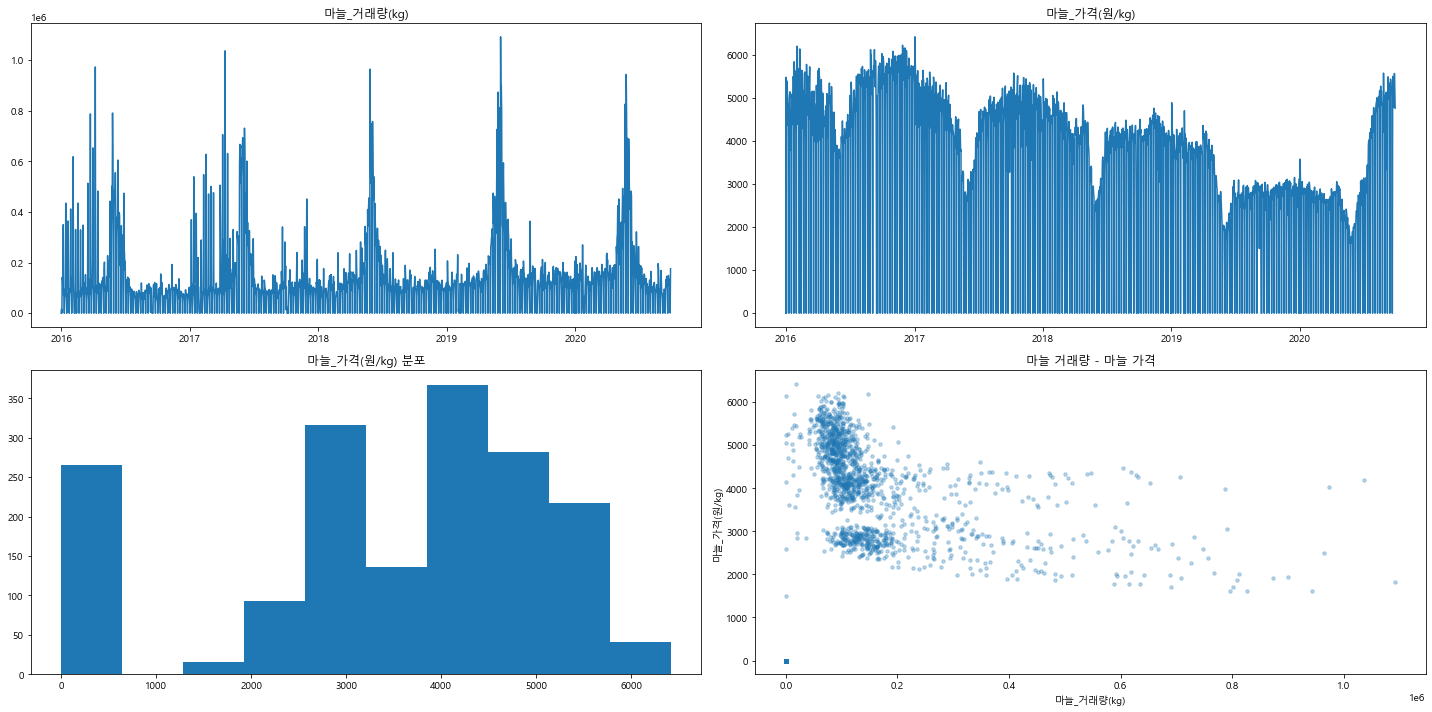

In [119]:
# 마늘

# 한지형: 10월 하순~ 11월 상순경에 파종하여 6월 하순 수확, 북부지방/내륙지방 재배
# 난지형: 8월 하순~ 9월 하순에 파종하여 4월 중순~6월 상순 수확, 전체 마늘 생산량의 80%
get_graph('마늘')


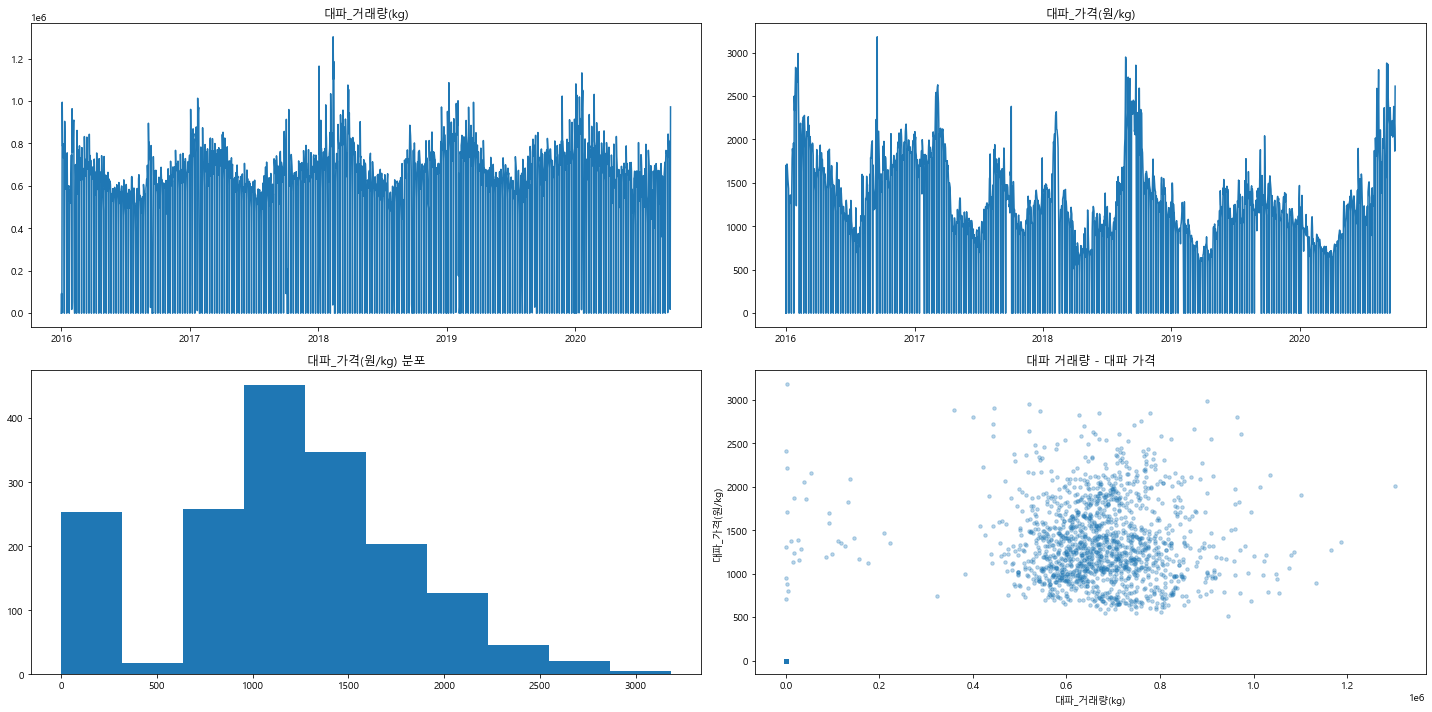

In [120]:
# 대파

# 겨울 대파: 1~3월 생산
# 구조파: 4~5월 생산
# 하우스 파: 6~8월 생산
# 노지파: 8월~10월 생산

get_graph('대파')


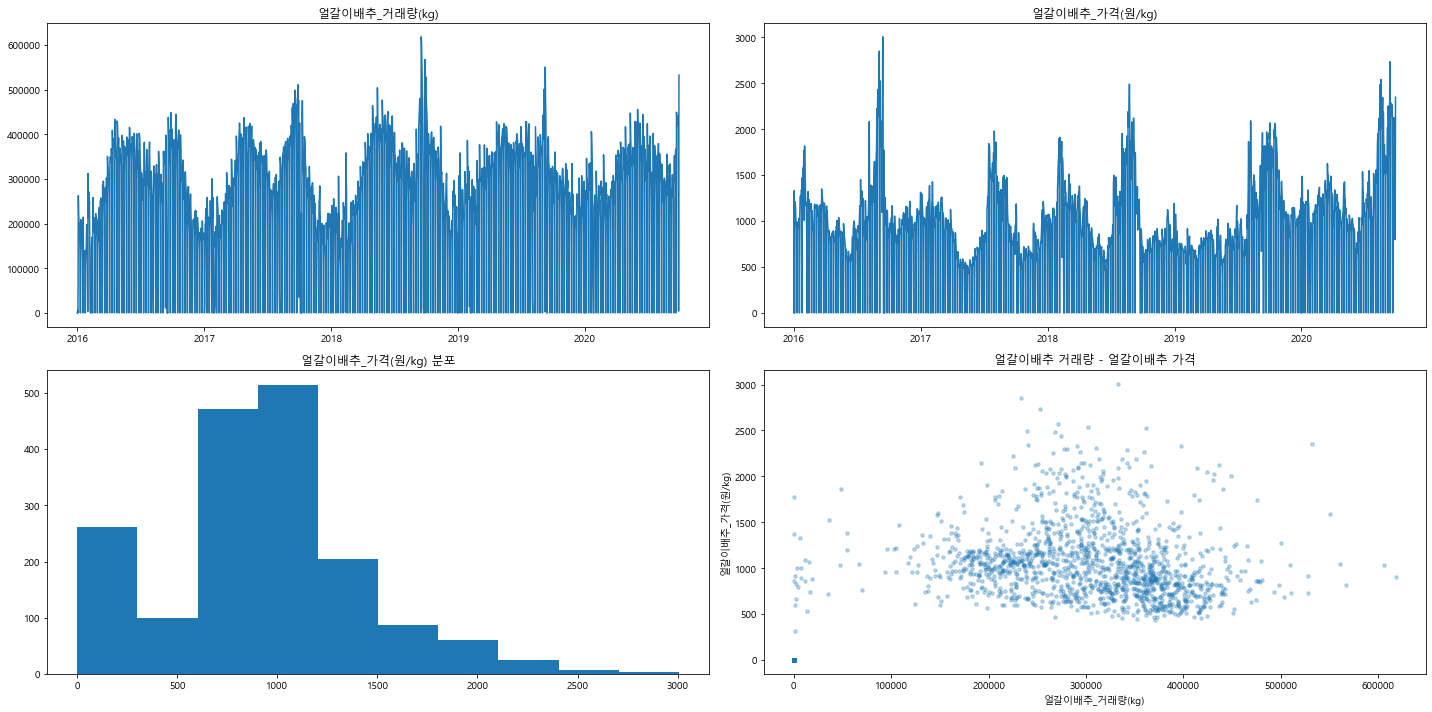

In [122]:
# 얼갈이 배추

# 주로 시설 재배
# 한여름과 겨울을 제외하고 5월6월 수확 or 10월11월 수확
# 현재는 품종 개량으로 연중 재배
get_graph('얼갈이배추')

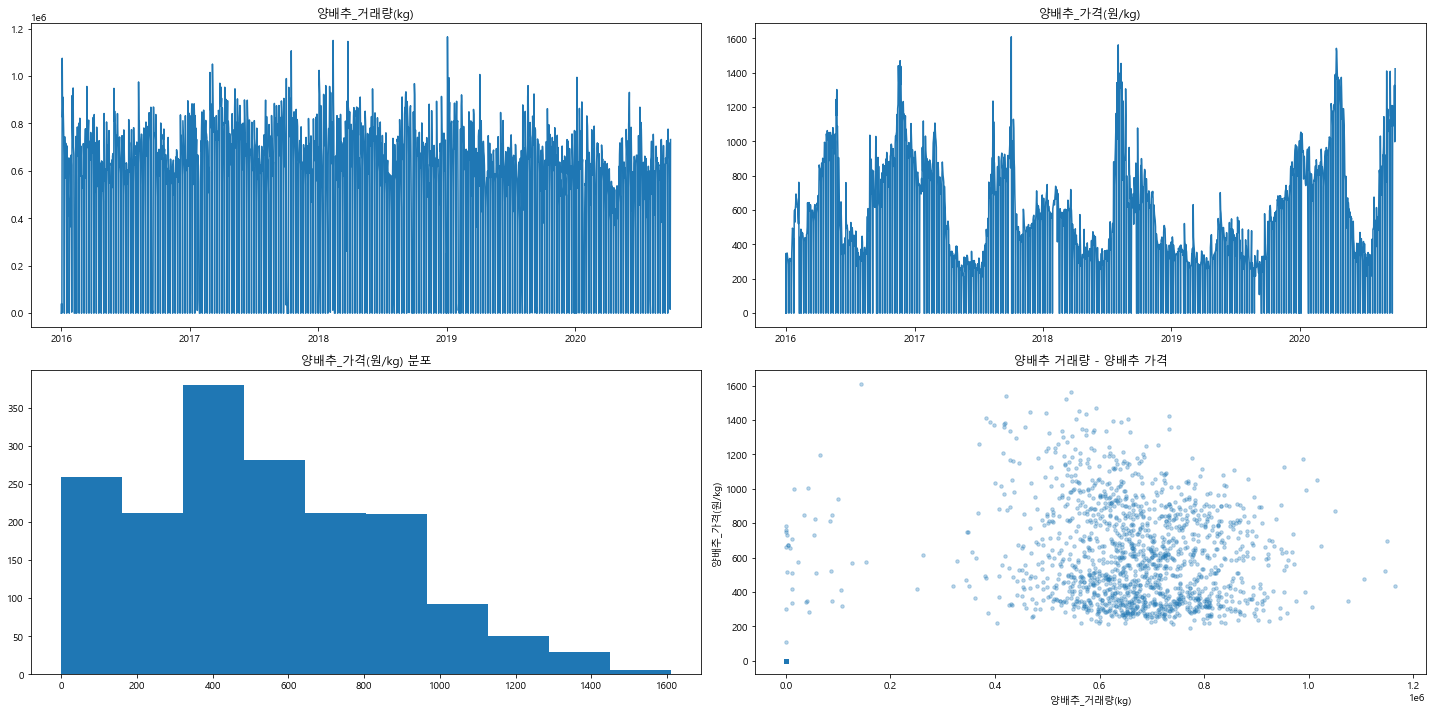

In [123]:
# 양배추

# 봄 재배: 7~8월 수확
# 가을 재배: 10~11월 수확
# 월동 재배: 3~5월 재배 (제주 & 남해안)
# 여름 재배: 9월 수확 (고랭지)
# 식생활의 서구화로 소비량이 늘어나고 있음

get_graph('양배추')


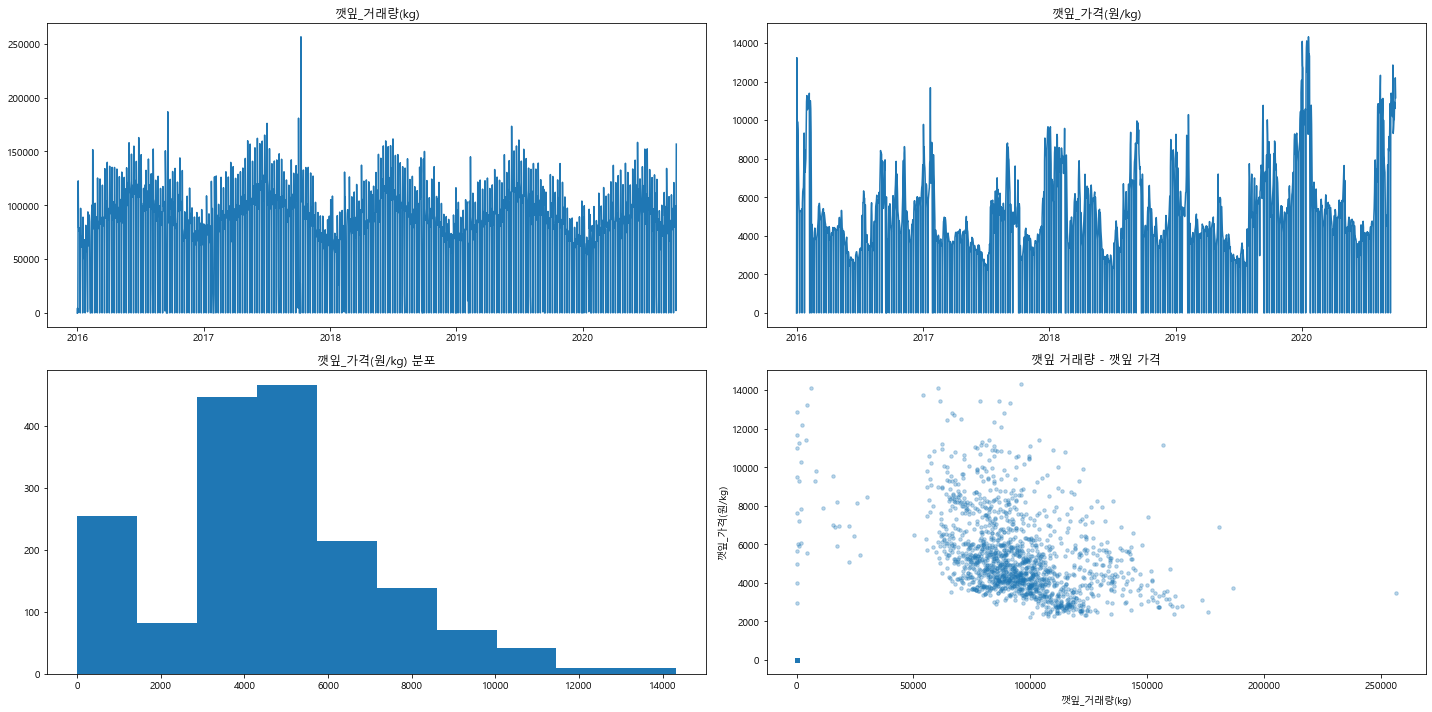

In [124]:
# 깻잎

# 가뭄의 영향을 잘 받지 않으며 사시사철 즐길 수 있음

get_graph('깻잎')


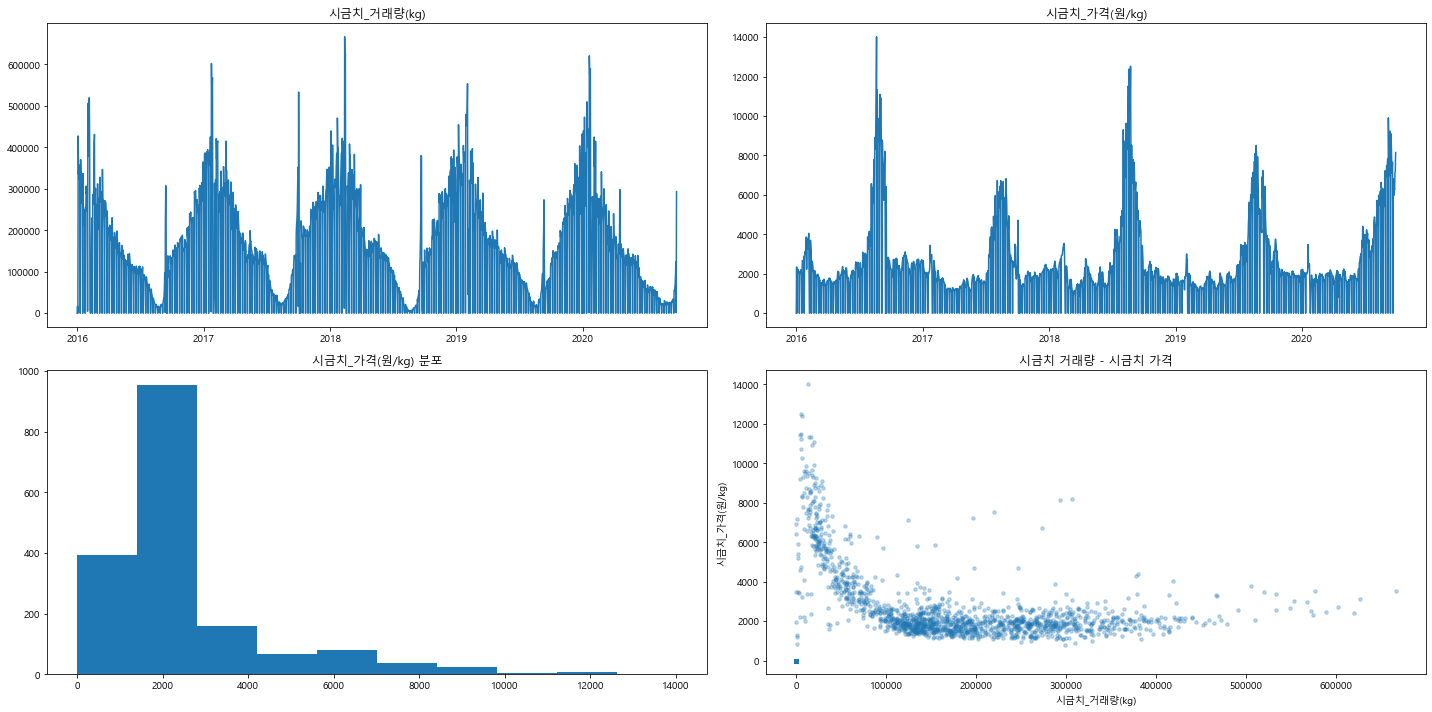

In [125]:
# 시금치

# 짧은 기간 급속히 발육, 파종 후 30~60일 후 수확함
# 봄 재배: 6월 출하
# 여름 재배: 7월 중순~9월 중순 출하
# 겨울 재배: 11월 중순~2월 중순

get_graph('시금치')

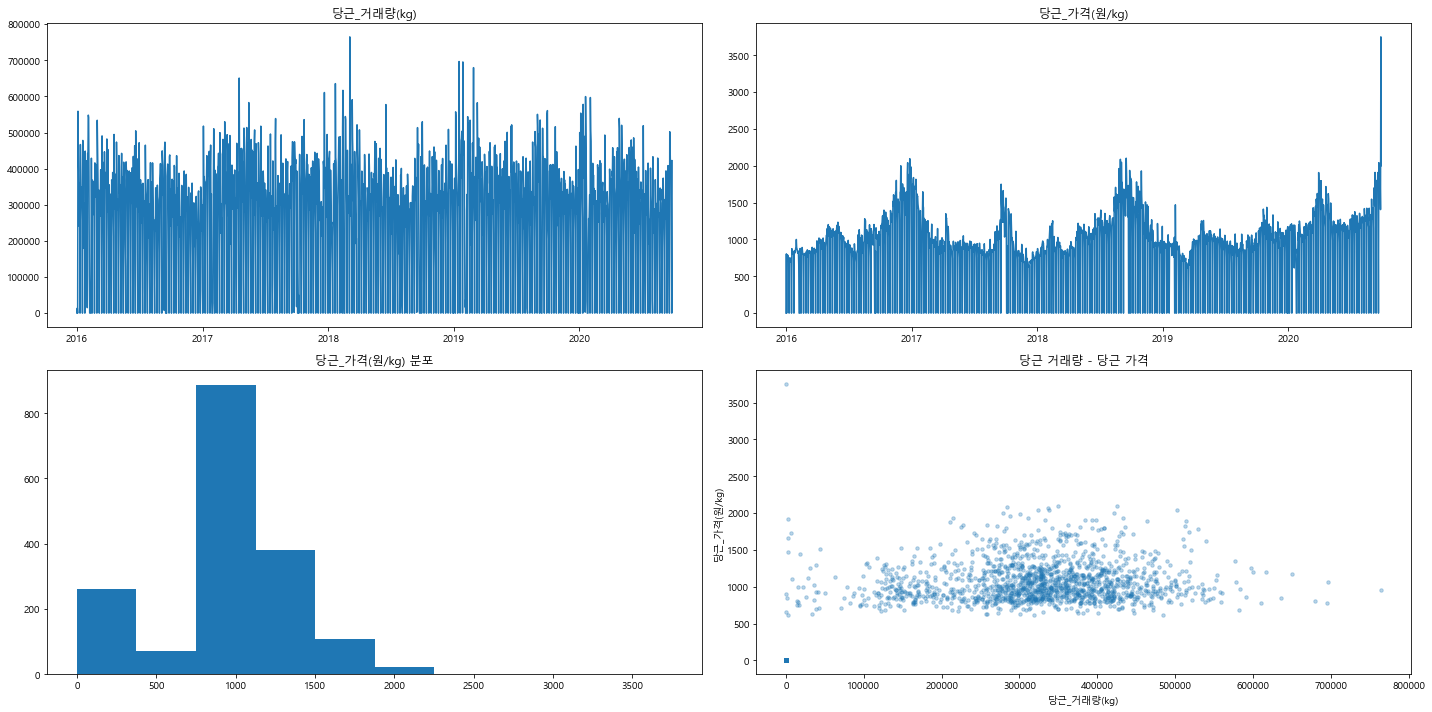

In [126]:
# 당근

# 고랭지 당근: 6월~8월 출하
# 가을 당근: 9월~11월 출하
# 겨울 당근: 11월~5월 출하(제주도, 출하기간이 가장 길다)

get_graph('당근')

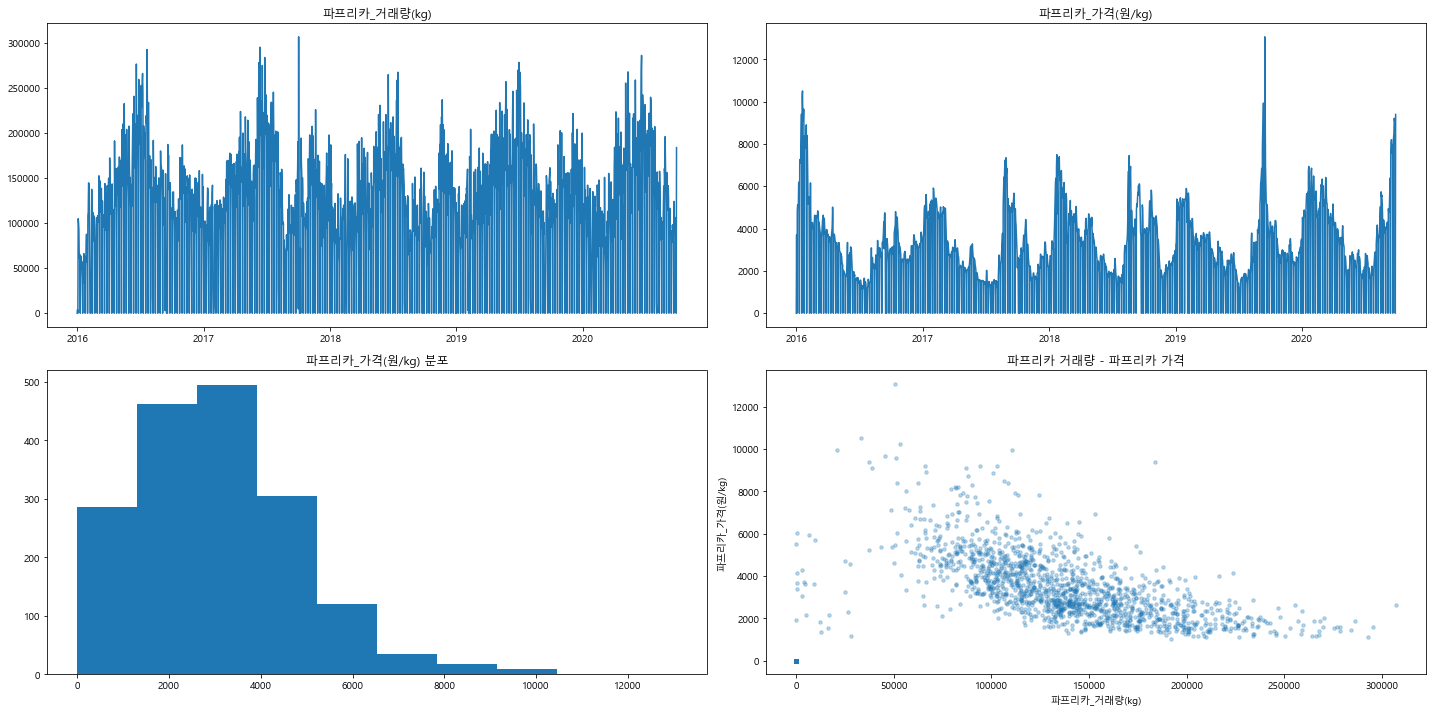

In [128]:
# 파프리카

# 겨울재배: 11월~7월 수확
# 여름재배: 6월 수확

get_graph('파프리카')

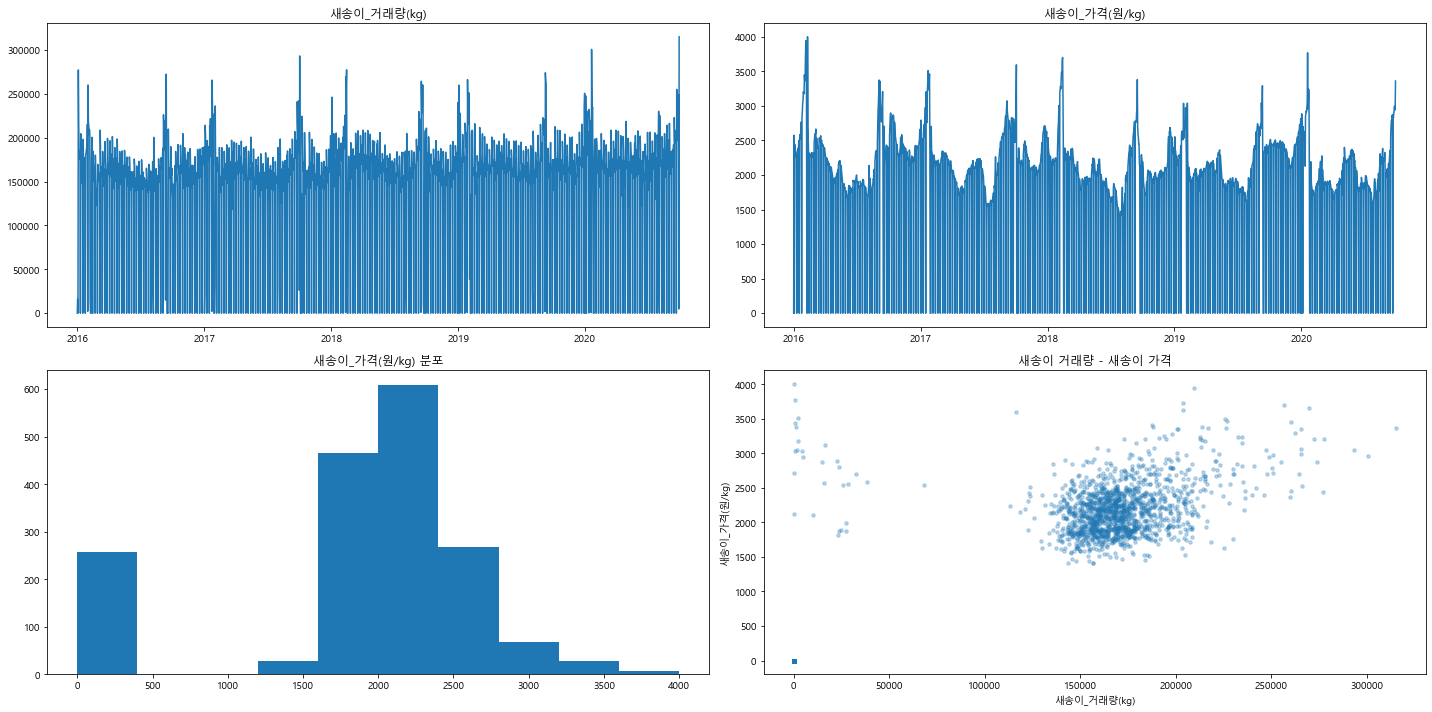

In [129]:
# 새송이

# 연중 출하
# 봄나물 소비시기인 3월5월, 더위로 전골 소비량이 줄어드는 7월8월 소비량이 줄어듬

get_graph('새송이')


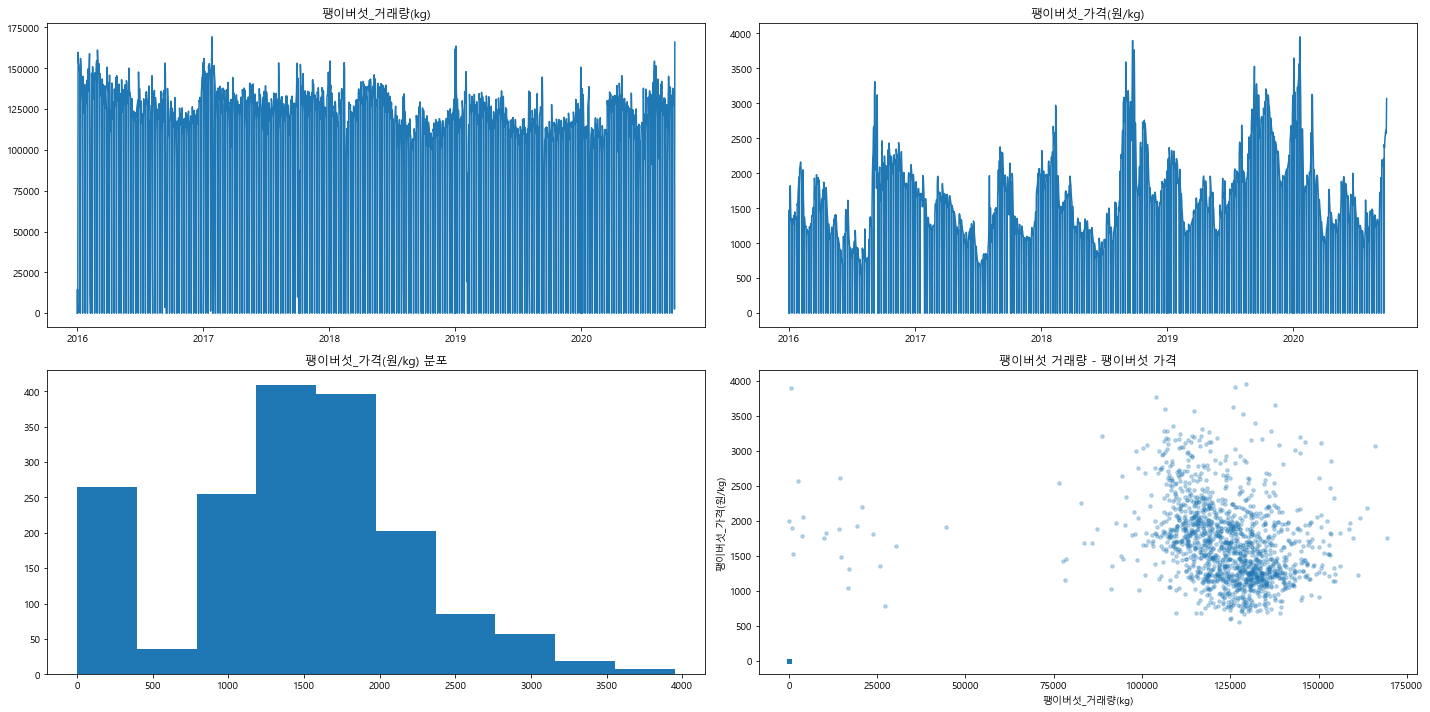

In [130]:
# 팽이버섯

# 식중독균 검출로 미국 수출이 어려워짐 (https://news.v.daum.net/v/20200504085326209)
# 소비 양상은 새송이와 비슷하지 않을까...

get_graph('팽이버섯')


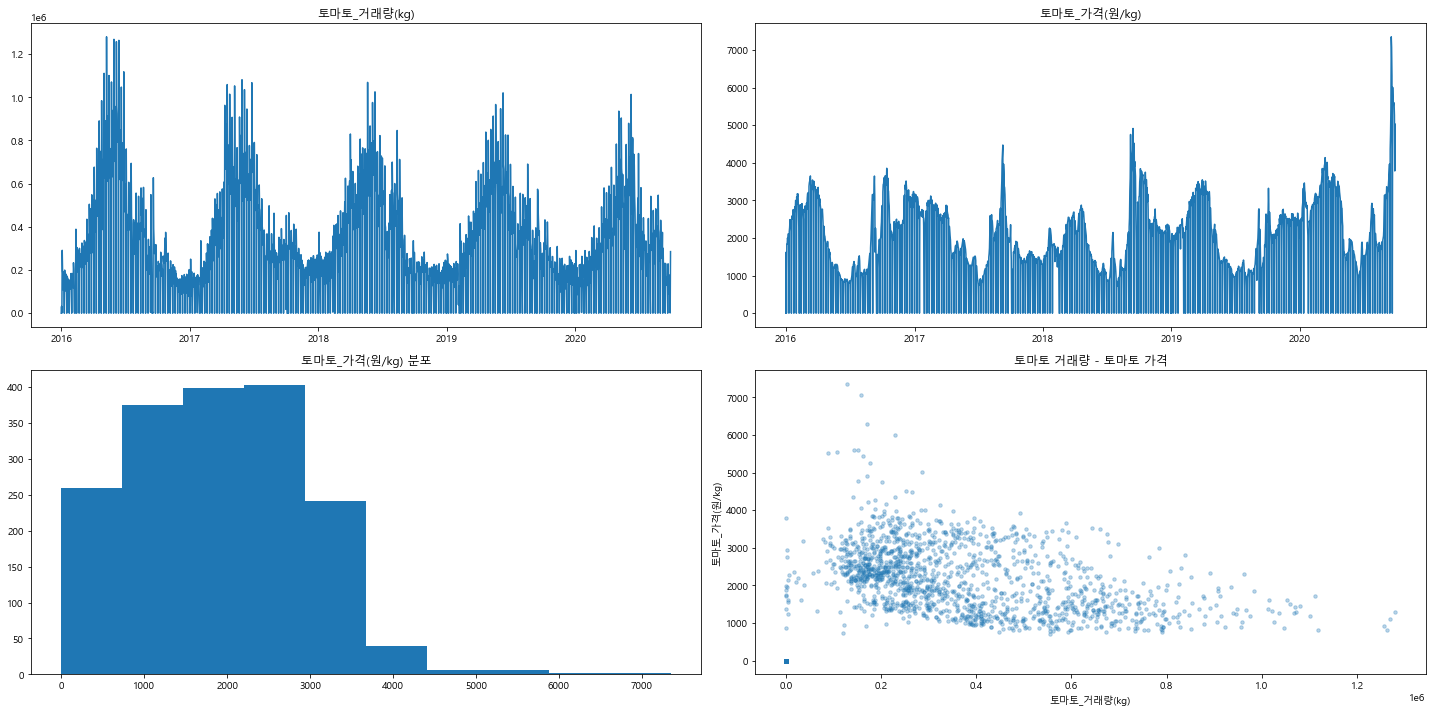

In [131]:
# 토마토

# 강원도 지역이 전체의 30% 차지
# 노지재배: 7월~10월 출하
# 시설재배: 연중 출하

get_graph('토마토')

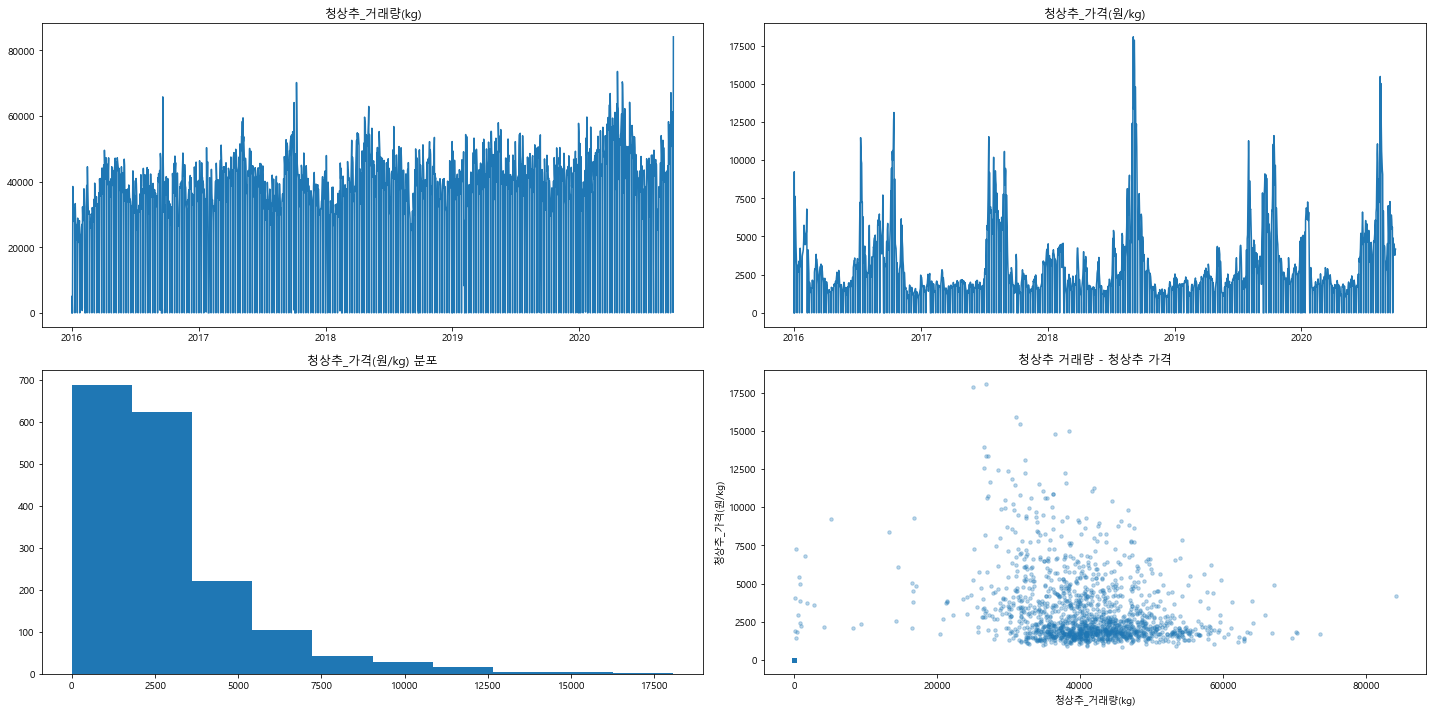

In [132]:
# 청상추

# 경기도가 출하량의 50% 차지
# 봄 재배: 4월~5월 출하
# 고랭지 재배: 8월~9월 출하
# 가을 재배: 1월~3월 출하
# 겨울 재배: 2월 출하

get_graph('청상추')

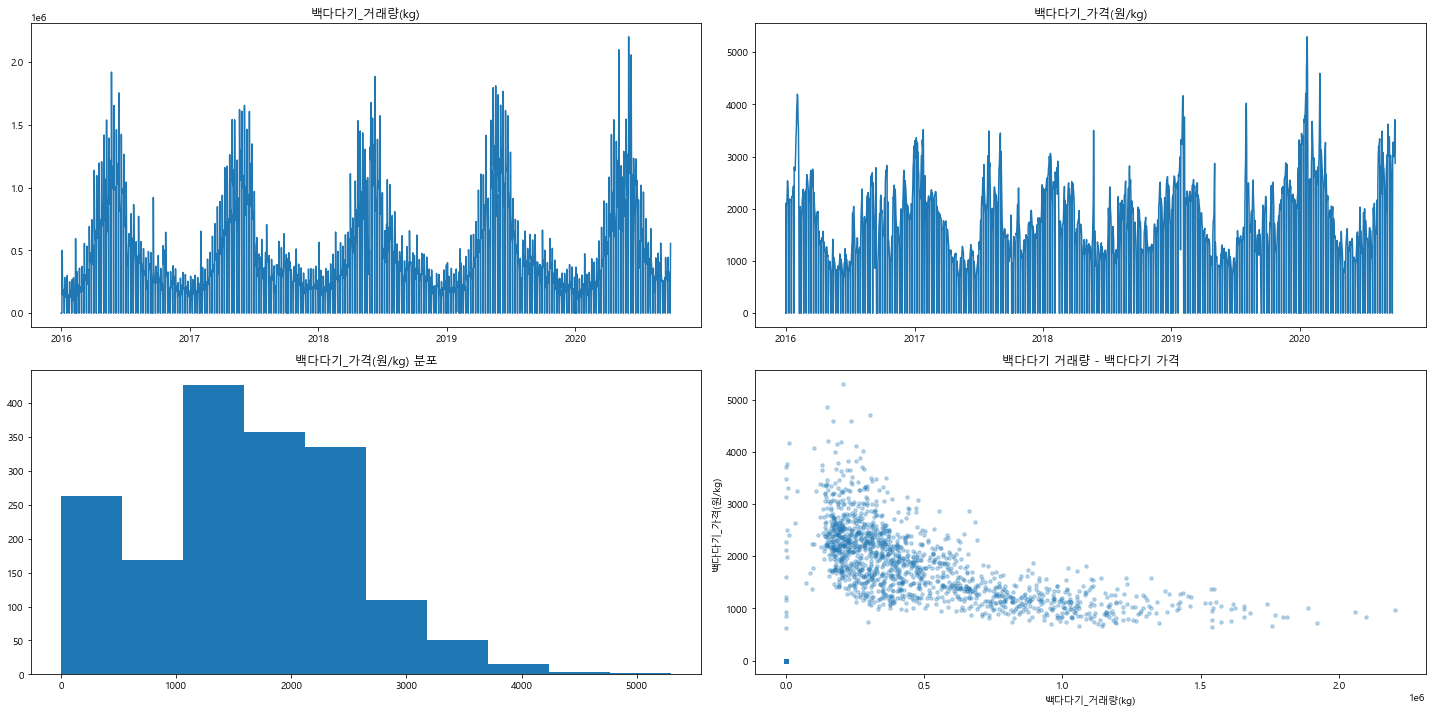

In [133]:
# 백다다기

# 주로 봄에 중부지방에서 재배, 봄가을 재배에 적합
# 날것, 샐러드, 절임용

get_graph('백다다기')

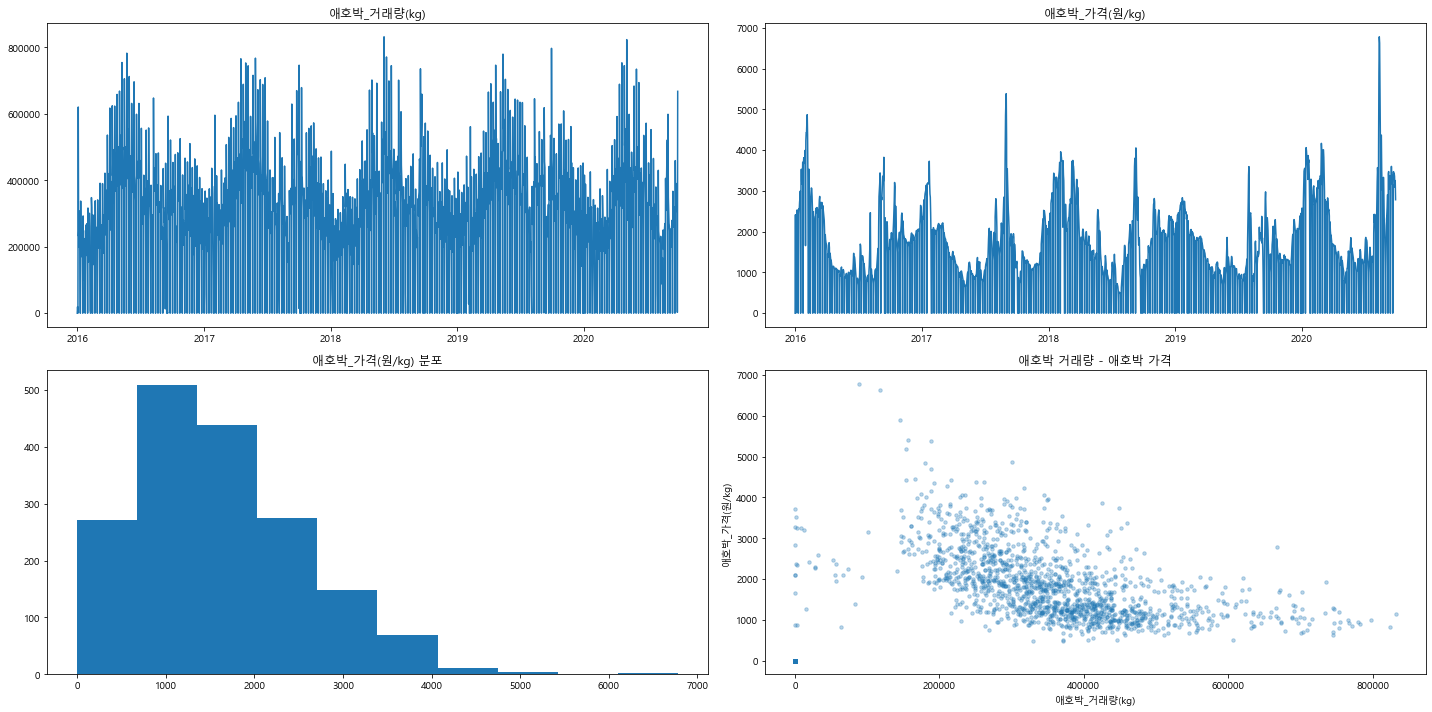

In [134]:
# 애호박

# 꽃을 따는 순간 인큐베이터를 씌워 재배하는 인큐베이터 애호박이 대부분으로, 비닐에 싸여 성장하기 때문에 유통과정의 손실이 적다

get_graph('애호박')

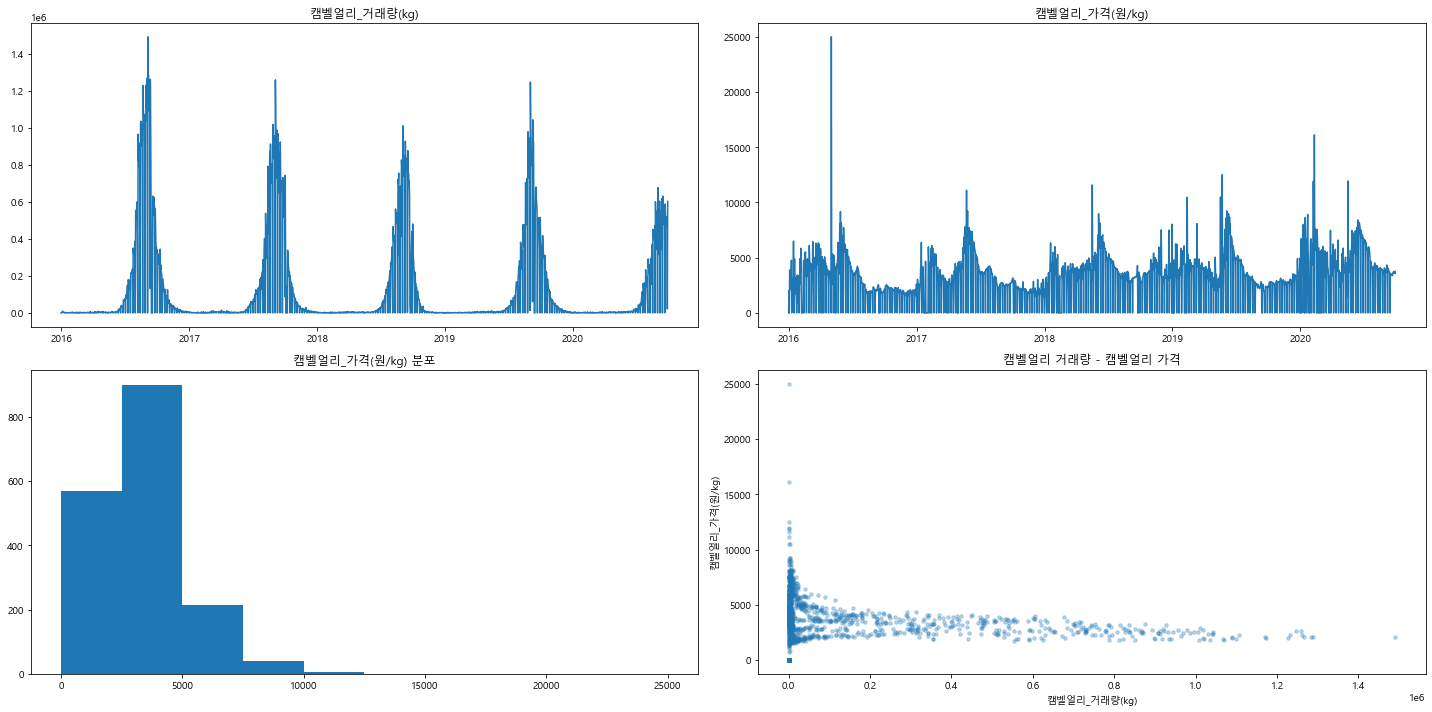

In [135]:
# 캠벨얼리

# 일반적으로 가장 많이 먹는 포도의 종류
# 가장 많이 재배되고 있는 포도 품종
# 최근 생산량이 줄어드는 추세

get_graph('캠벨얼리')

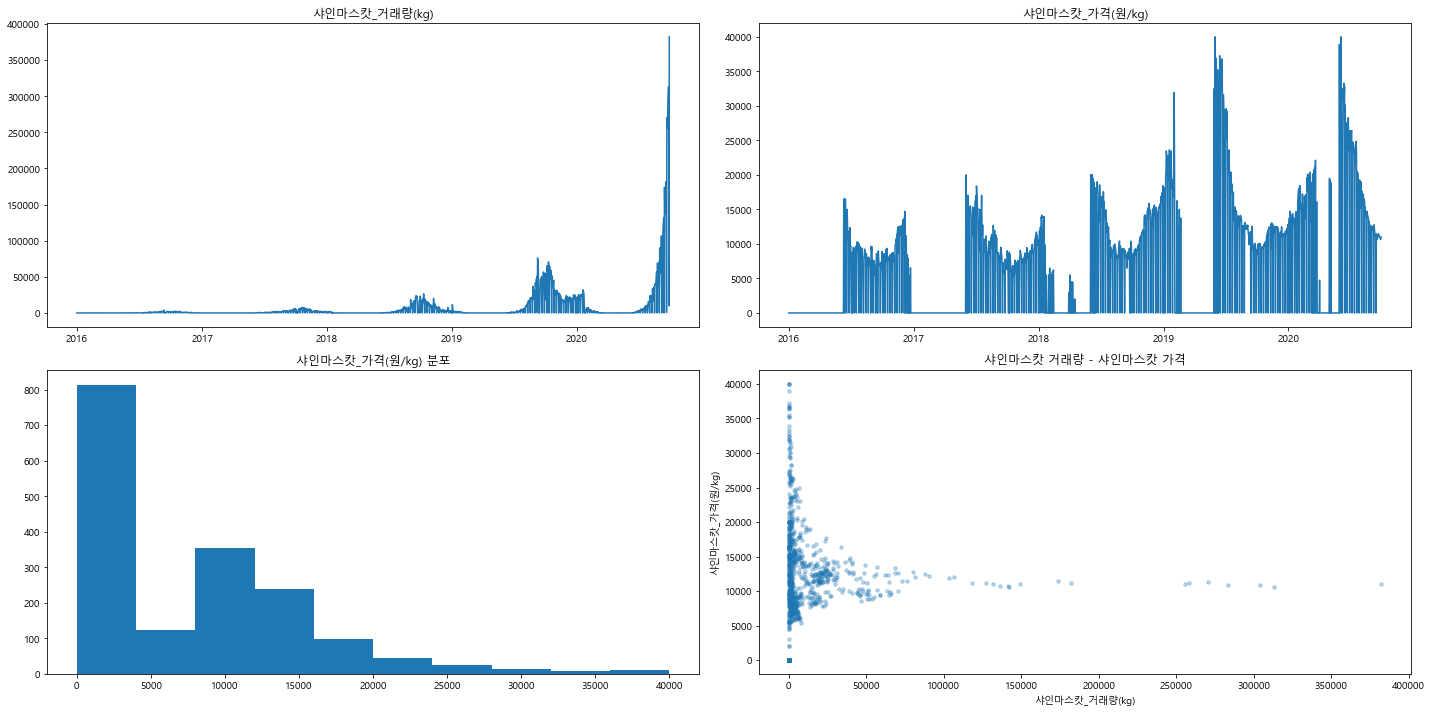

In [136]:
# 샤인마스캇

# 생산량이 큰 폭으로 늘어나는 추세
# 수출이 늘어나고 있음

get_graph('샤인마스캇')